In [41]:
import numpy as np
import pandas as pd
import seaborn as sns
from os import path
from PIL import Image
import matplotlib.pyplot as plt 

In [42]:
dataset =pd.read_csv("D:\TY miniproject\demo\Akanksha52\TY miniproject\Karad.csv")
dataset.head()


Gram_panchayat      Village                               Sample_source  \
0    Abaichiwadi  Abaichiwadi             Anganwadi name : ABAICHIWADI 11   
1    Abaichiwadi  Abaichiwadi             Anganwadi name : ABAICHIWADI 12   
2    Abaichiwadi  Abaichiwadi                    School name : z.p.school   
3    Abaichiwadi  Abaichiwadi  Individual house tap water Baburav Nangare   
4    Abaichiwadi  Abaichiwadi   Individual house tap water Sambhaji Surve   

  Sample_tested_date  Temperature   Colour   Odour   Taste   Turbidity   pH  \
0         26-09-2023         26.0      0.0     0.0     0.0         0.5  7.3   
1         02-06-2023         34.0      2.0     0.0     0.0         0.5  7.2   
2         02-06-2023         34.0      2.0     0.0     0.0         0.5  7.2   
3         02-06-2023         34.0      2.0     0.0     0.0         0.5  7.2   
4         02-06-2023         34.0      2.0     0.0     0.0         0.5  7.2   

     TDS   Total_Alkalinity   Chloride   Fluoride   Nitrate   Sulphate  \
0  160.0               34.0       33.0      0.001      0.12       0.90   
1  258.0               40.0       40.0      0.480     16.99       0.92   
2  258.0               40.0       40.0      0.480     16.99       0.92   
3  258.0               40.0       40.0      0.480     16.99       0.92   
4  258.0               40.0       40.0      0.480     16.99       0.92   

    Total_Hardness   Iron  Conductivity  
0            186.0   0.06         210.0  
1            152.0   0.08         340.0  
2            152.0   0.08         340.0  
3            152.0   0.08         340.0  
4            152.0   0.08         340.0

In [43]:
dataset.columns

Index(['Gram_panchayat', 'Village', 'Sample_source', 'Sample_tested_date',
       'Temperature', ' Colour', ' Odour', ' Taste', ' Turbidity', ' pH',
       'TDS', ' Total_Alkalinity', ' Chloride', ' Fluoride', ' Nitrate',
       ' Sulphate', ' Total_Hardness', ' Iron', 'Conductivity'],
      dtype='object')

In [44]:
# plt.figure(figsize=(10, 8))
# sns.heatmap(dataset.corr(), annot= True, cmap='coolwarm')

In [45]:
#missing valus implementation
dataset['Temperature']=dataset['Temperature'].fillna(dataset['Temperature'].mean())
dataset[' Colour']=dataset[' Colour'].fillna(dataset[' Colour'].mean())
dataset[' Odour']=dataset[' Odour'].fillna(dataset[' Odour'].mean())
dataset[' Taste']=dataset[' Taste'].fillna(dataset[' Taste'].mean())
dataset[' Turbidity']=dataset[' Turbidity'].fillna(dataset[' Turbidity'].mean())
dataset[' pH']=dataset[' pH'].fillna(dataset[' pH'].mean())
dataset['TDS']=dataset['TDS'].fillna(dataset['TDS'].mean())
dataset[' Total_Alkalinity']=dataset[' Total_Alkalinity'].fillna(dataset[' Total_Alkalinity'].mean())
dataset[' Chloride']=dataset[' Chloride'].fillna(dataset[' Chloride'].mean())
dataset[' Fluoride']=dataset[' Fluoride'].fillna(dataset[' Fluoride'].mean())
dataset[' Nitrate']=dataset[' Nitrate'].fillna(dataset[' Nitrate'].mean())
dataset[' Sulphate']=dataset[' Sulphate'].fillna(dataset[' Sulphate'].mean())
dataset[' Total_Hardness']=dataset[' Total_Hardness'].fillna(dataset[' Total_Hardness'].mean())
dataset[' Iron']=dataset[' Iron'].fillna(dataset[' Iron'].mean())
dataset['Conductivity']=dataset['Conductivity'].fillna(dataset['Conductivity'].mean())

In [46]:
#After fillup Check null values
dataset.isnull().sum()

Gram_panchayat         0
Village                0
Sample_source         16
Sample_tested_date     0
Temperature            0
 Colour                0
 Odour                 0
 Taste                 0
 Turbidity             0
 pH                    0
TDS                    0
 Total_Alkalinity      0
 Chloride              0
 Fluoride              0
 Nitrate               0
 Sulphate              0
 Total_Hardness        0
 Iron                  0
Conductivity           0
dtype: int64

In [47]:
# plt.figure(figsize=(10, 8))
# sns.heatmap(dataset.corr(), annot= True, cmap='coolwarm')

In [48]:
print("There are {} observations and {} features in this dataset. \n".format(dataset.shape[0],dataset.shape[1]))

print("There are {} Gram panchayat where water quality is predicted  in this dataset such as {}... \n".format(len(dataset.Gram_panchayat.unique()), 
                                                                           ", ".join(dataset.Gram_panchayat.unique()[0:5])))

print("There are {}  Villages in this dataset such as {}... \n".format(len(dataset.Village.unique()), 
                                                                                      ", ".join(dataset.Village.unique()[0:5])))

There are 1426 observations and 19 features in this dataset. 

There are 184 Gram panchayat where water quality is predicted  in this dataset such as Abaichiwadi, Adarshnagar, Akaichiwadi, Ambavade, Andharwadi... 

There are 199  Villages in this dataset such as Abaichiwadi, Aadarshnagar, Akaichiwadi, Botrewadi (n.v.), Ambavade... 



In [49]:
##########################################               TDS                         #########################################################

In [50]:
dataset_TDS= dataset.iloc[:,[0,10]]
x=dataset_TDS.iloc[:,0]
y=dataset_TDS.iloc[:,1]
dataset_TDS.head()

Gram_panchayat    TDS
0    Abaichiwadi  160.0
1    Abaichiwadi  258.0
2    Abaichiwadi  258.0
3    Abaichiwadi  258.0
4    Abaichiwadi  258.0

In [51]:
Gram_panchayat = dataset.groupby("Gram_panchayat")

# Summary statistic of all Parameters
Gram_panchayat.describe().head()

Temperature                                                    \
                     count       mean       std        min   25%   50%   75%   
Gram_panchayat                                                                 
Abaichiwadi            7.0  32.857143  3.023716  26.000000  34.0  34.0  34.0   
Adarshnagar            2.0  26.000000  0.000000  26.000000  26.0  26.0  26.0   
Akaichiwadi            9.0  31.444444  3.086710  26.000000  33.0  33.0  33.0   
Ambavade               5.0  32.116716  0.992237  30.583578  32.0  32.0  33.0   
Andharwadi             5.0  32.600000  1.516575  30.000000  33.0  33.0  33.0   

                      Colour            ...  Iron           Conductivity  \
                 max   count      mean  ...   75%       max        count   
Gram_panchayat                          ...                                
Abaichiwadi     34.0     7.0  1.142857  ...  0.08  0.180000          7.0   
Adarshnagar     26.0     2.0  0.000000  ...  0.06  0.060000          2.0   
Akaichiwadi     33.0     9.0  1.777778  ...  0.08  0.090000          9.0   
Ambavade        33.0     5.0  0.331879  ...  0.02  0.278161          5.0   
Andharwadi      34.0     5.0  2.600000  ...  0.08  0.130000          5.0   

                                                                                
                      mean         std    min    25%    50%    75%         max  
Gram_panchayat                                                                  
Abaichiwadi     381.428571  173.822570  210.0  340.0  340.0  340.0  760.000000  
Adarshnagar     289.000000  111.722871  210.0  249.5  289.0  328.5  368.000000  
Akaichiwadi     524.666667  225.048884  256.0  388.0  388.0  810.0  828.000000  
Ambavade        240.007174  192.317887  154.0  154.0  154.0  154.0  584.035868  
Andharwadi      504.400000  137.467451  349.0  474.0  474.0  498.0  727.000000  

[5 rows x 120 columns]

In [52]:
# Gram_panchayat.mean().sort_values(by="TDS",ascending=False).head()

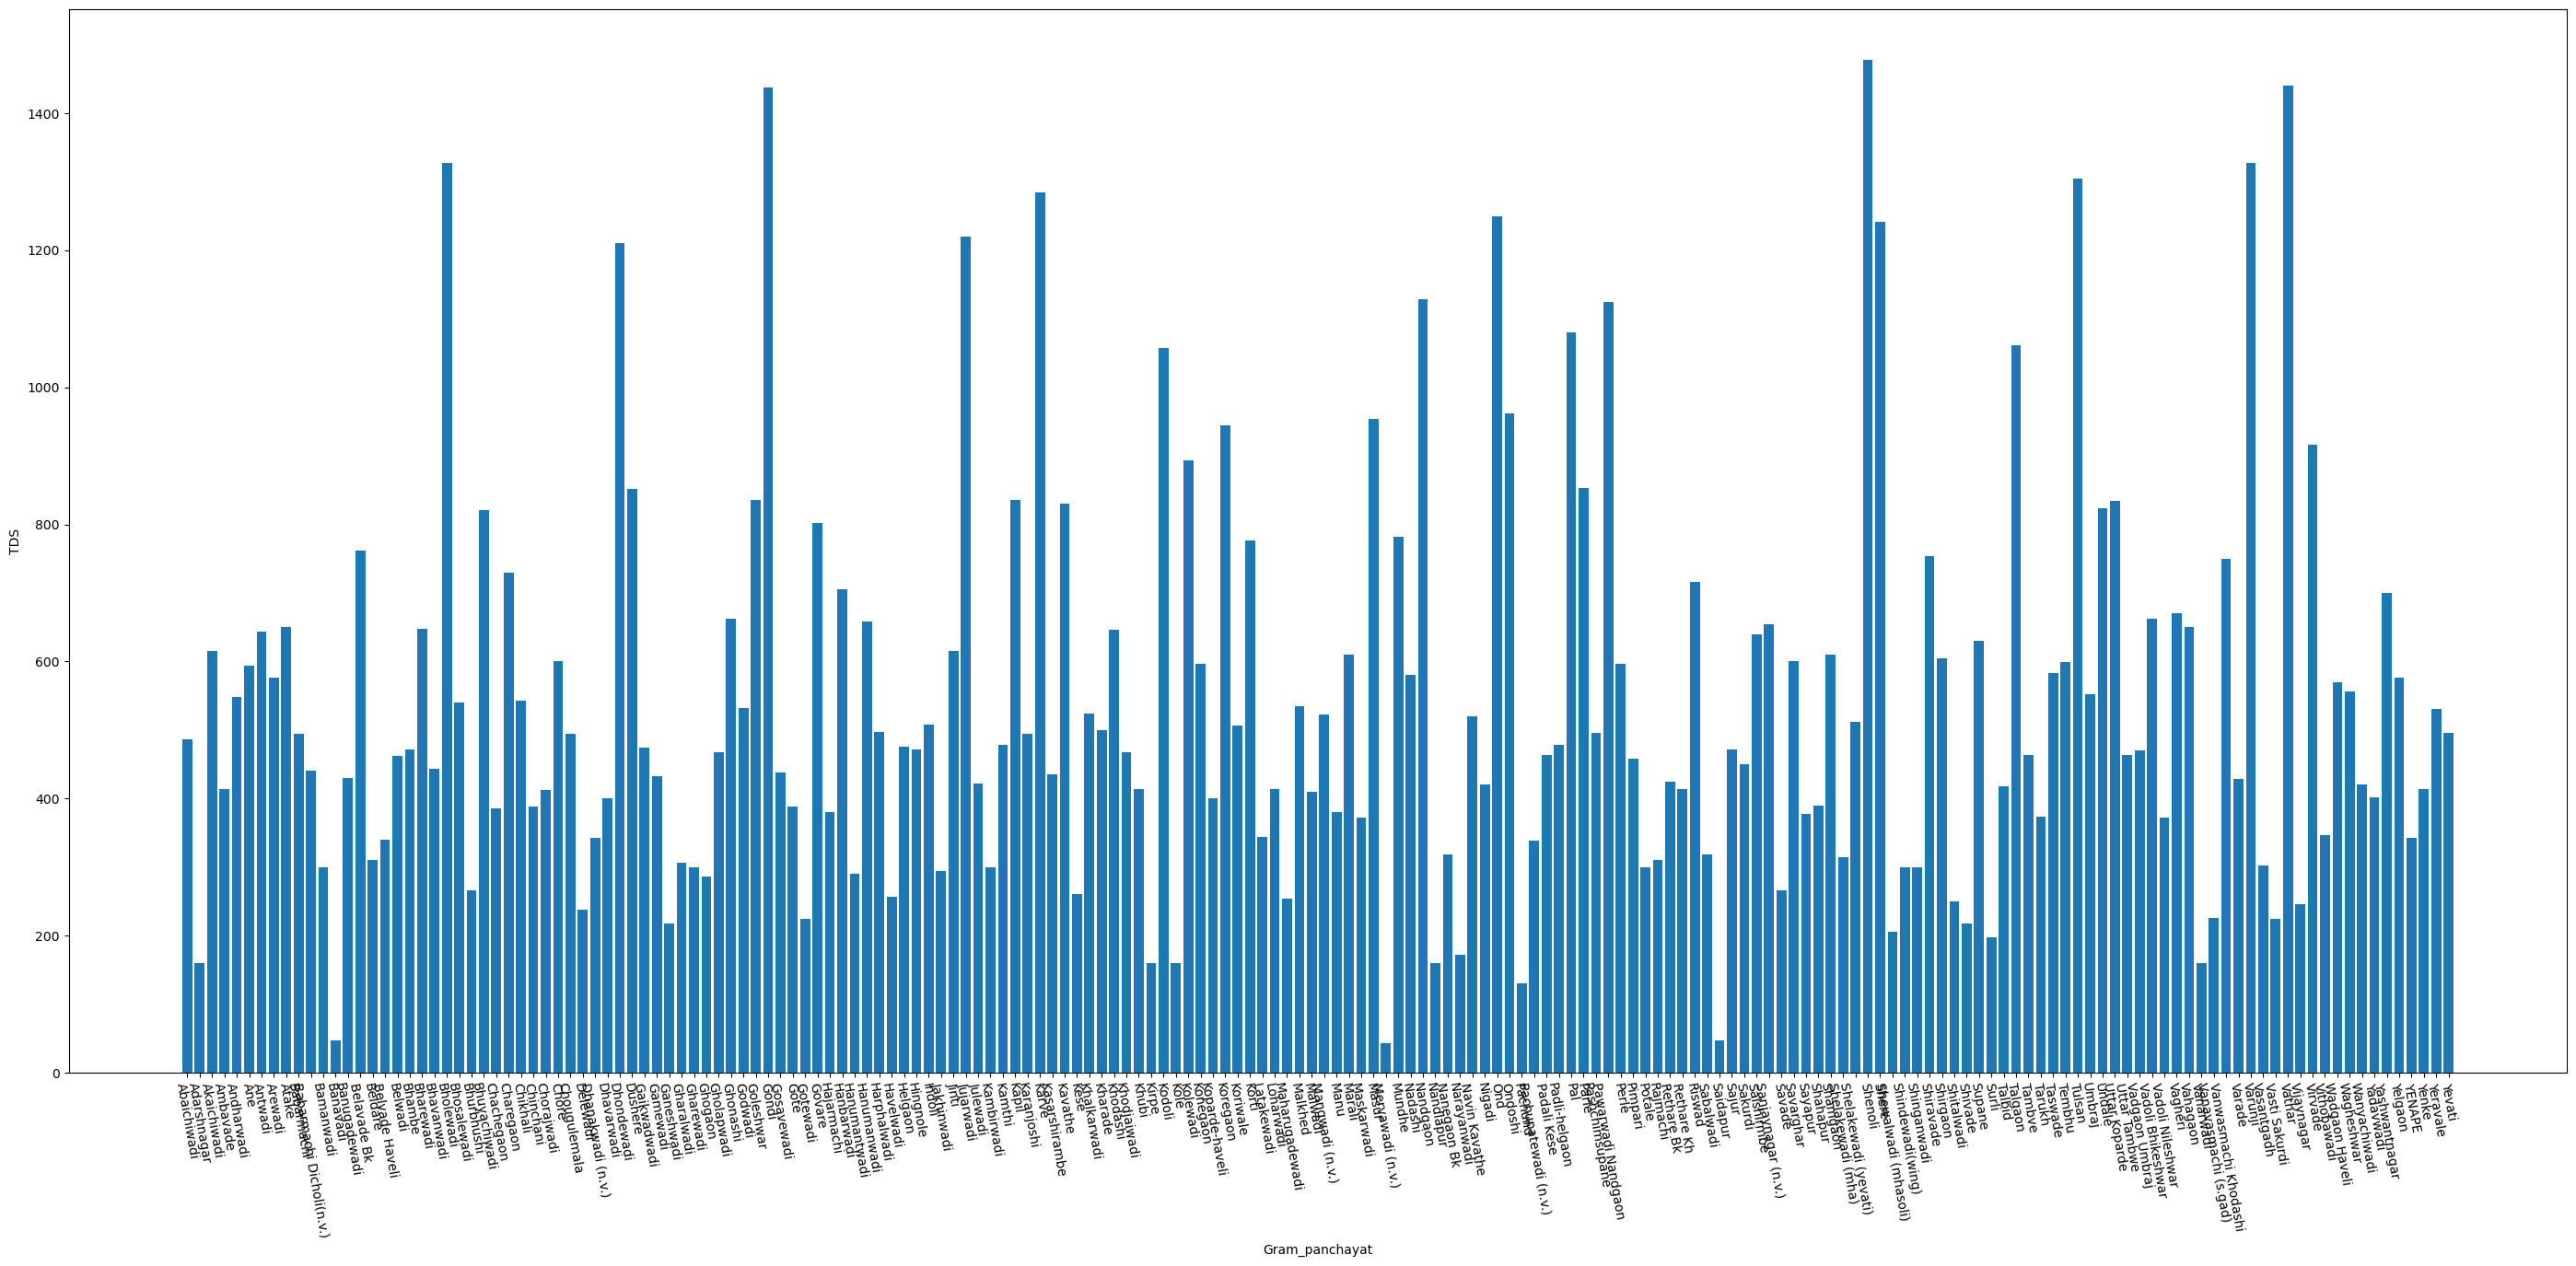

In [53]:
plt.figure(figsize=(35,15))
plt.bar(x,y)
#Gram_panchayat.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=1000)
plt.xlabel("Gram_panchayat")
plt.ylabel("TDS")
plt.show()

In [54]:
###########################                      PH                ############################################################

In [55]:
# dataset =pd.read_csv("D:\Sayali\Karad1.csv")
# dataset1.head()


In [56]:
dataset_PH = dataset.iloc[:,[0,9]]
x=dataset_PH.iloc[:,0]
y=dataset_PH.iloc[:,1]
dataset_PH.head()

Gram_panchayat   pH
0    Abaichiwadi  7.3
1    Abaichiwadi  7.2
2    Abaichiwadi  7.2
3    Abaichiwadi  7.2
4    Abaichiwadi  7.2

In [57]:
Gram_panchayat = dataset_PH.groupby("Gram_panchayat")

# Summary statistic of all Parameters
Gram_panchayat.describe().head()

pH                                                   
               count      mean       std  min  25%  50%   75%       max
Gram_panchayat                                                         
Abaichiwadi      7.0  7.228571  0.048795  7.2  7.2  7.2  7.25  7.300000
Adarshnagar      2.0  7.300000  0.000000  7.3  7.3  7.3  7.30  7.300000
Akaichiwadi      9.0  7.188889  0.116667  7.0  7.2  7.2  7.30  7.300000
Ambavade         5.0  7.048483  0.108411  7.0  7.0  7.0  7.00  7.242415
Andharwadi       5.0  7.218000  0.040249  7.2  7.2  7.2  7.20  7.290000

In [58]:
Gram_panchayat.mean().sort_values(by=" pH",ascending=False).head()

pH
Gram_panchayat              
Shenoli             7.571035
Nandgaon            7.477778
Dhondewadi          7.466667
Ond                 7.451111
Pawarwadi Nandgaon  7.450000

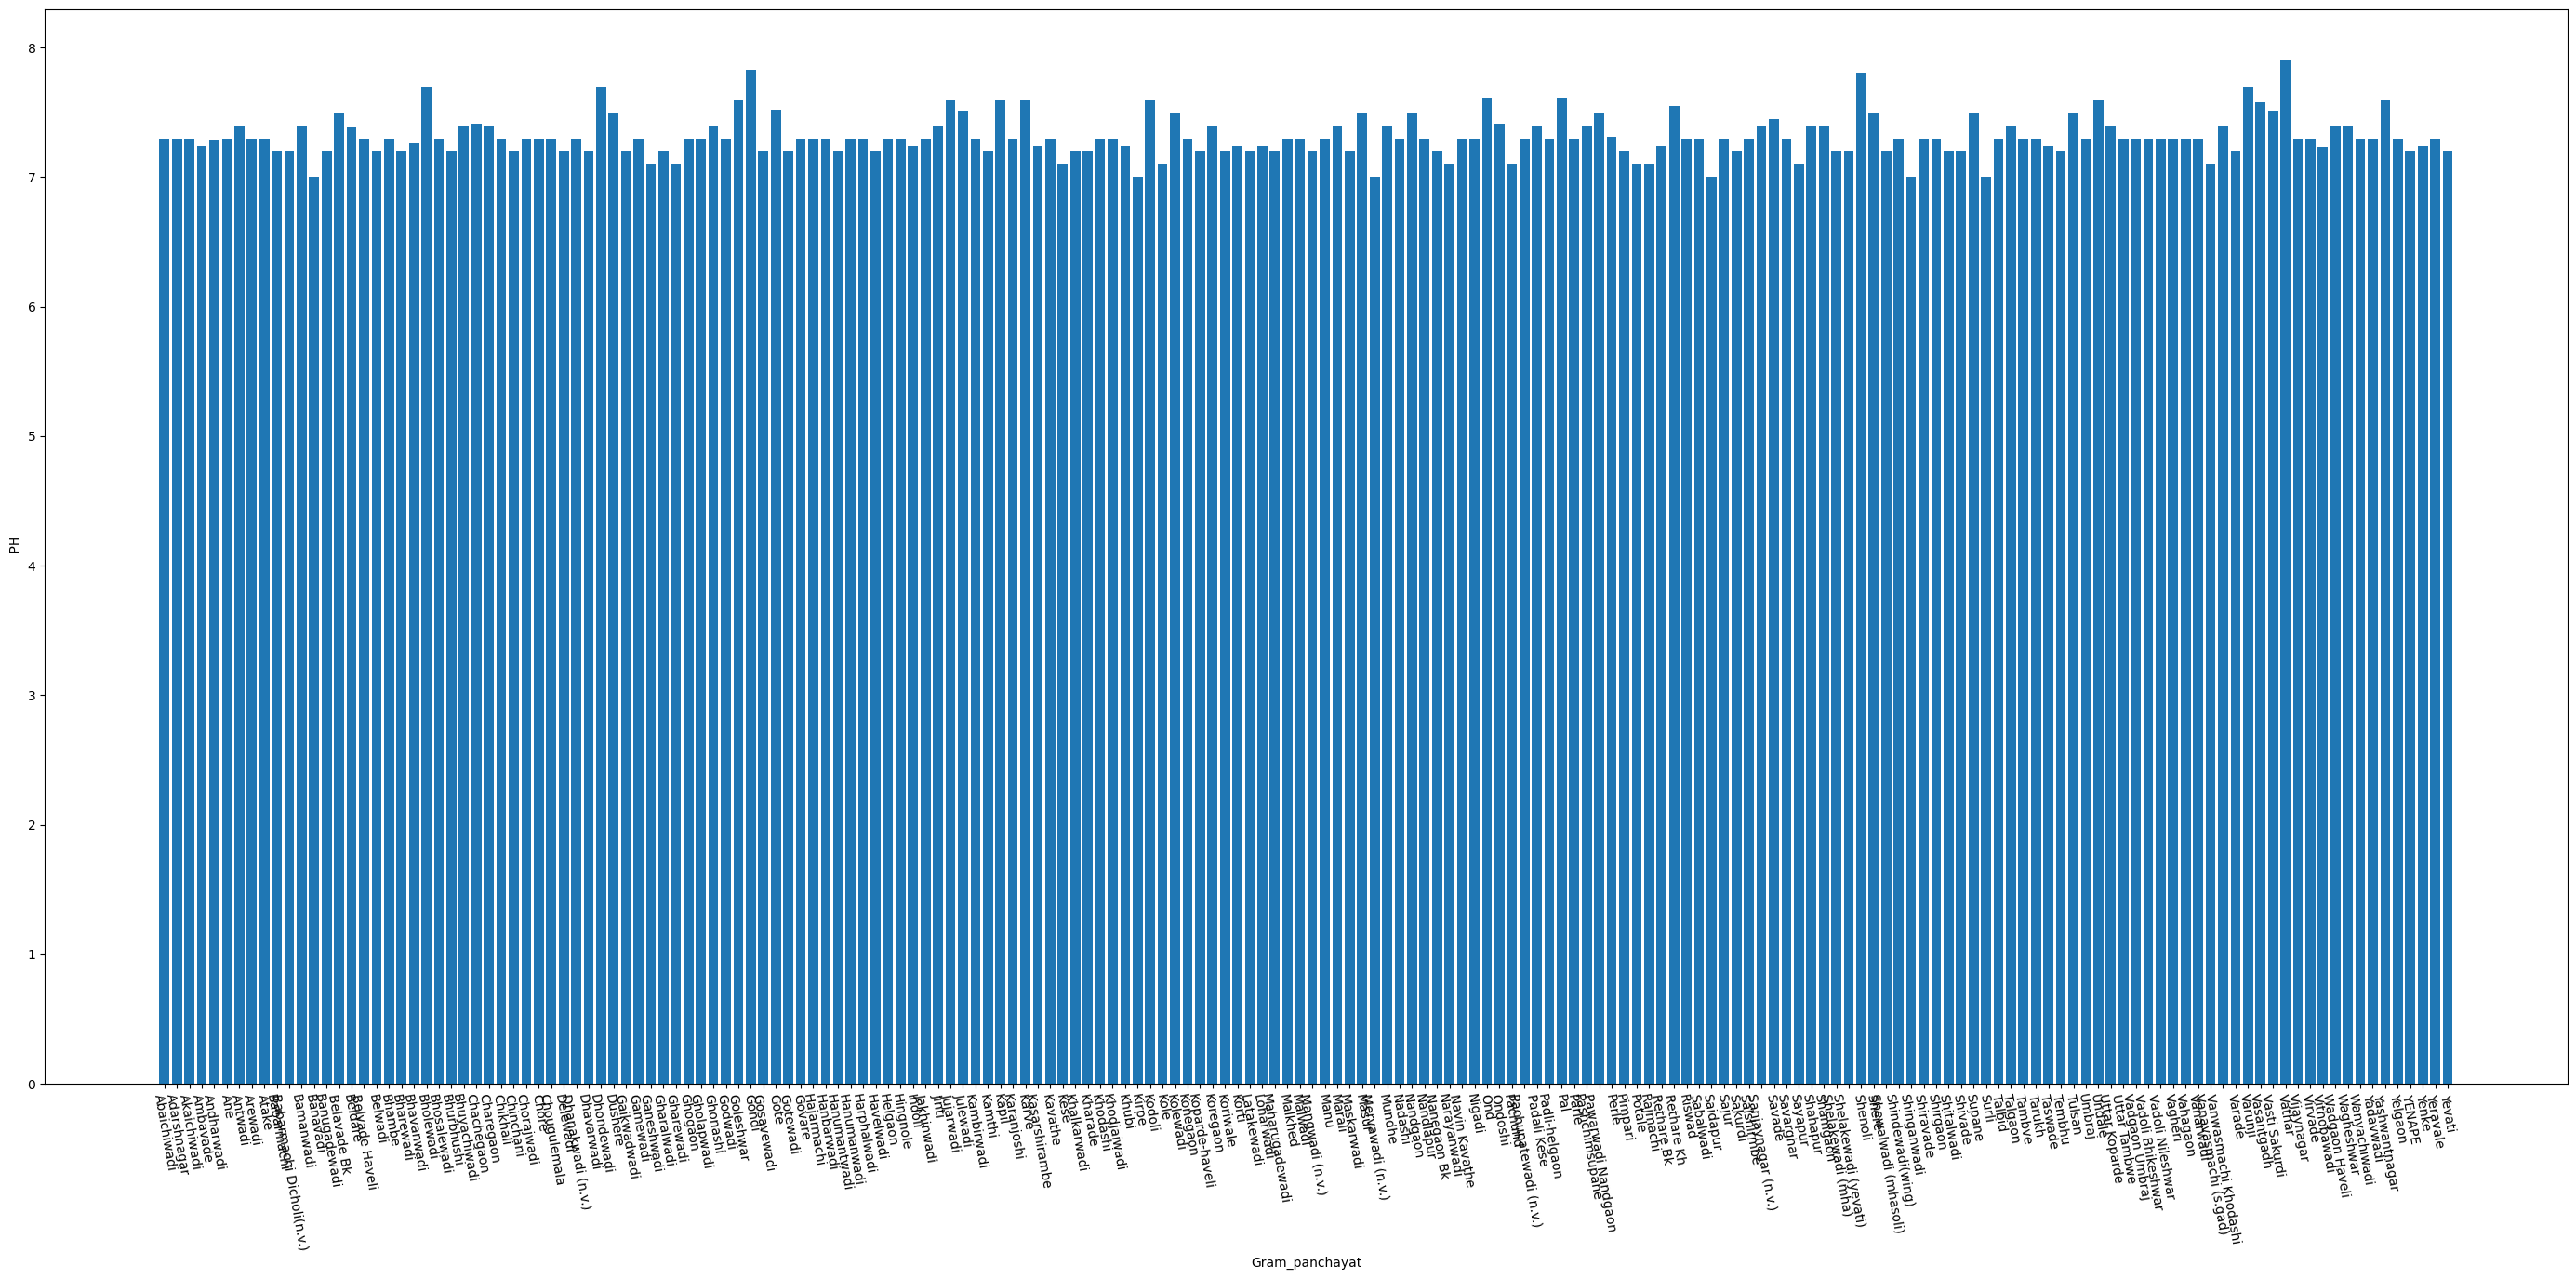

In [59]:
plt.figure(figsize=(35,15))
plt.bar(x,y)
#Gram_panchayat.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=1000)
plt.xlabel("Gram_panchayat")
plt.ylabel(" PH")
plt.show()

In [60]:
###################################                      TEMPERATURE                    #################################

In [61]:
# dataset2 =pd.read_csv("D:\Sayali\Karad1.csv")
# dataset2.head()


In [62]:
dataset_temperature = dataset.iloc[:,[0,4]]
x=dataset_temperature.iloc[:,0]
y=dataset_temperature.iloc[:,1]
dataset_temperature.head()

Gram_panchayat  Temperature
0    Abaichiwadi         26.0
1    Abaichiwadi         34.0
2    Abaichiwadi         34.0
3    Abaichiwadi         34.0
4    Abaichiwadi         34.0

In [63]:
Gram_panchayat = dataset_temperature.groupby("Gram_panchayat")

# Summary statistic of all Parameters
Gram_panchayat.describe().head()

Temperature                                                    \
                     count       mean       std        min   25%   50%   75%   
Gram_panchayat                                                                 
Abaichiwadi            7.0  32.857143  3.023716  26.000000  34.0  34.0  34.0   
Adarshnagar            2.0  26.000000  0.000000  26.000000  26.0  26.0  26.0   
Akaichiwadi            9.0  31.444444  3.086710  26.000000  33.0  33.0  33.0   
Ambavade               5.0  32.116716  0.992237  30.583578  32.0  32.0  33.0   
Andharwadi             5.0  32.600000  1.516575  30.000000  33.0  33.0  33.0   

                      
                 max  
Gram_panchayat        
Abaichiwadi     34.0  
Adarshnagar     26.0  
Akaichiwadi     33.0  
Ambavade        33.0  
Andharwadi      34.0

In [64]:
Gram_panchayat.mean().sort_values(by="Temperature",ascending=False).head()

Temperature
Gram_panchayat                       
Kese                             34.0
Babarmachi Dicholi(n.v.)         34.0
Tambve                           34.0
Sayapur                          34.0
Tembhu                           34.0

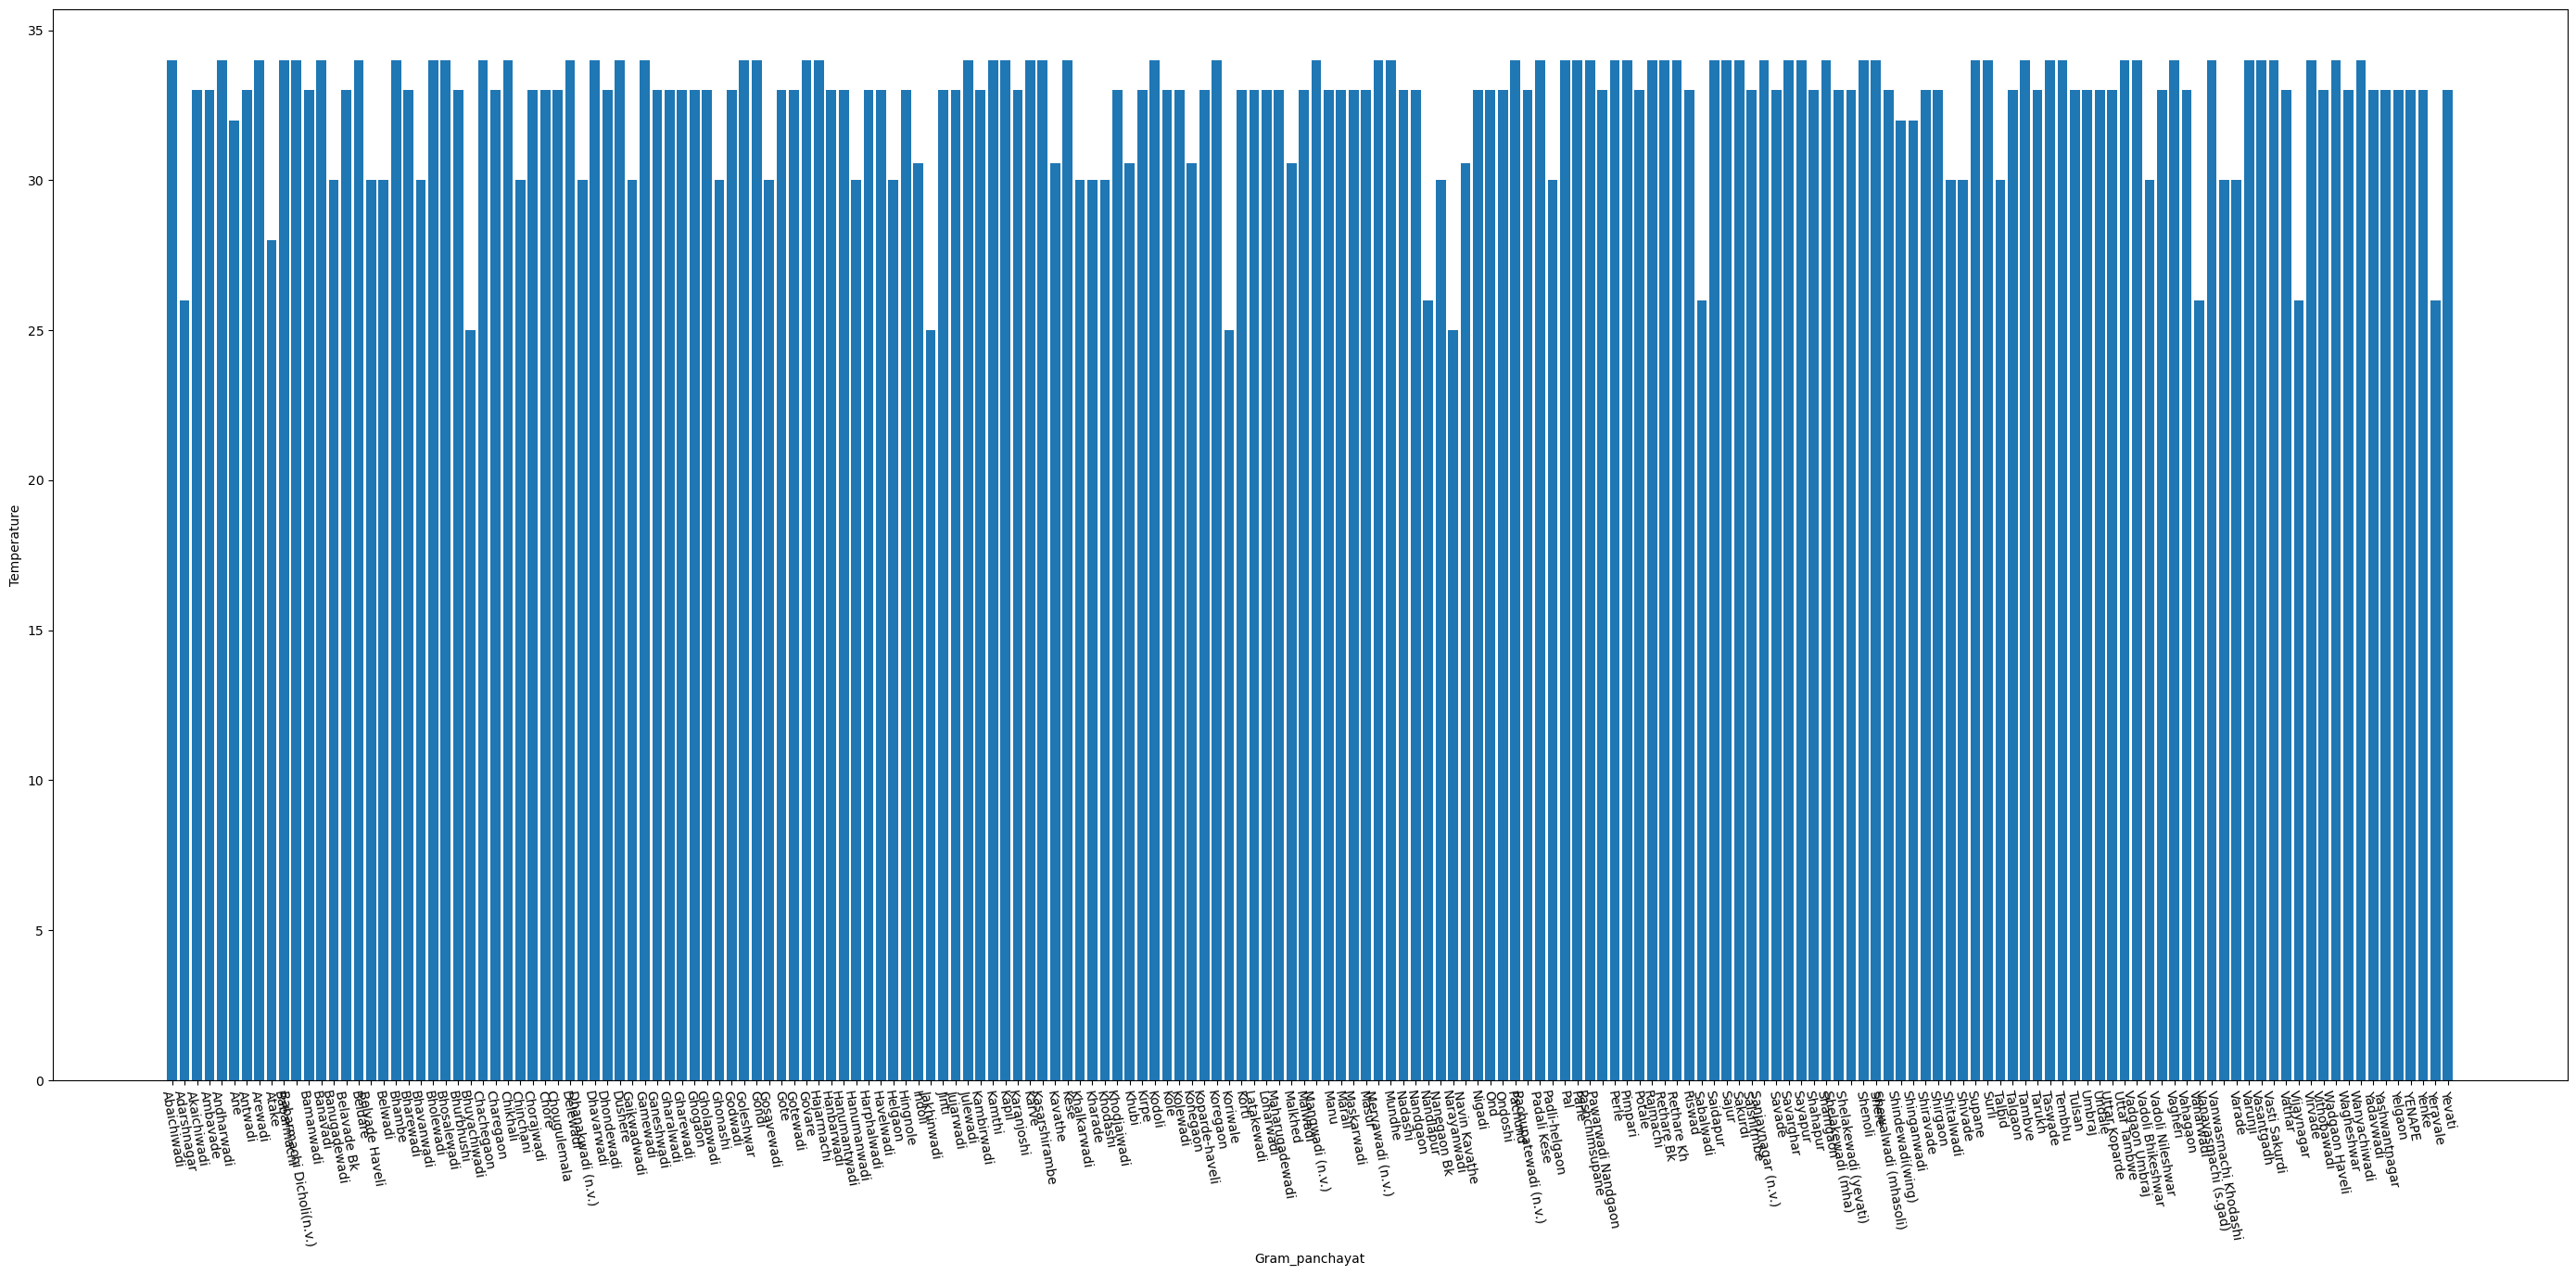

In [65]:
plt.figure(figsize=(35,15))
plt.bar(x,y)
#Gram_panchayat.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=1000)
plt.xlabel("Gram_panchayat")
plt.ylabel("Temperature")
plt.show()

In [66]:
#########################                            Turbidity           ########################################

In [67]:
dataset_Turbidity = dataset.iloc[:,[0,8]]
x=dataset_Turbidity.iloc[:,0]
y=dataset_Turbidity.iloc[:,1]
dataset_Turbidity.head()

Gram_panchayat   Turbidity
0    Abaichiwadi         0.5
1    Abaichiwadi         0.5
2    Abaichiwadi         0.5
3    Abaichiwadi         0.5
4    Abaichiwadi         0.5

In [68]:
Gram_panchayat = dataset_Turbidity.groupby("Gram_panchayat")

# Summary statistic of all Parameters
Gram_panchayat.describe().head()

Turbidity                                                  
                    count      mean       std  min  25%  50%  75%       max
Gram_panchayat                                                             
Abaichiwadi           7.0  0.500000  0.000000  0.5  0.5  0.5  0.5  0.500000
Adarshnagar           2.0  0.500000  0.000000  0.5  0.5  0.5  0.5  0.500000
Akaichiwadi           9.0  0.555556  0.088192  0.4  0.6  0.6  0.6  0.600000
Ambavade              5.0  0.417051  0.038128  0.4  0.4  0.4  0.4  0.485257
Andharwadi            5.0  0.460000  0.089443  0.3  0.5  0.5  0.5  0.500000

In [69]:
Gram_panchayat.mean().sort_values(by=" Turbidity",ascending=False).head()

Turbidity
Gram_panchayat            
Tambve            0.800000
Arewadi           0.800000
Uttar Tambwe      0.800000
Mundhe            0.800000
Gamewadi          0.757143

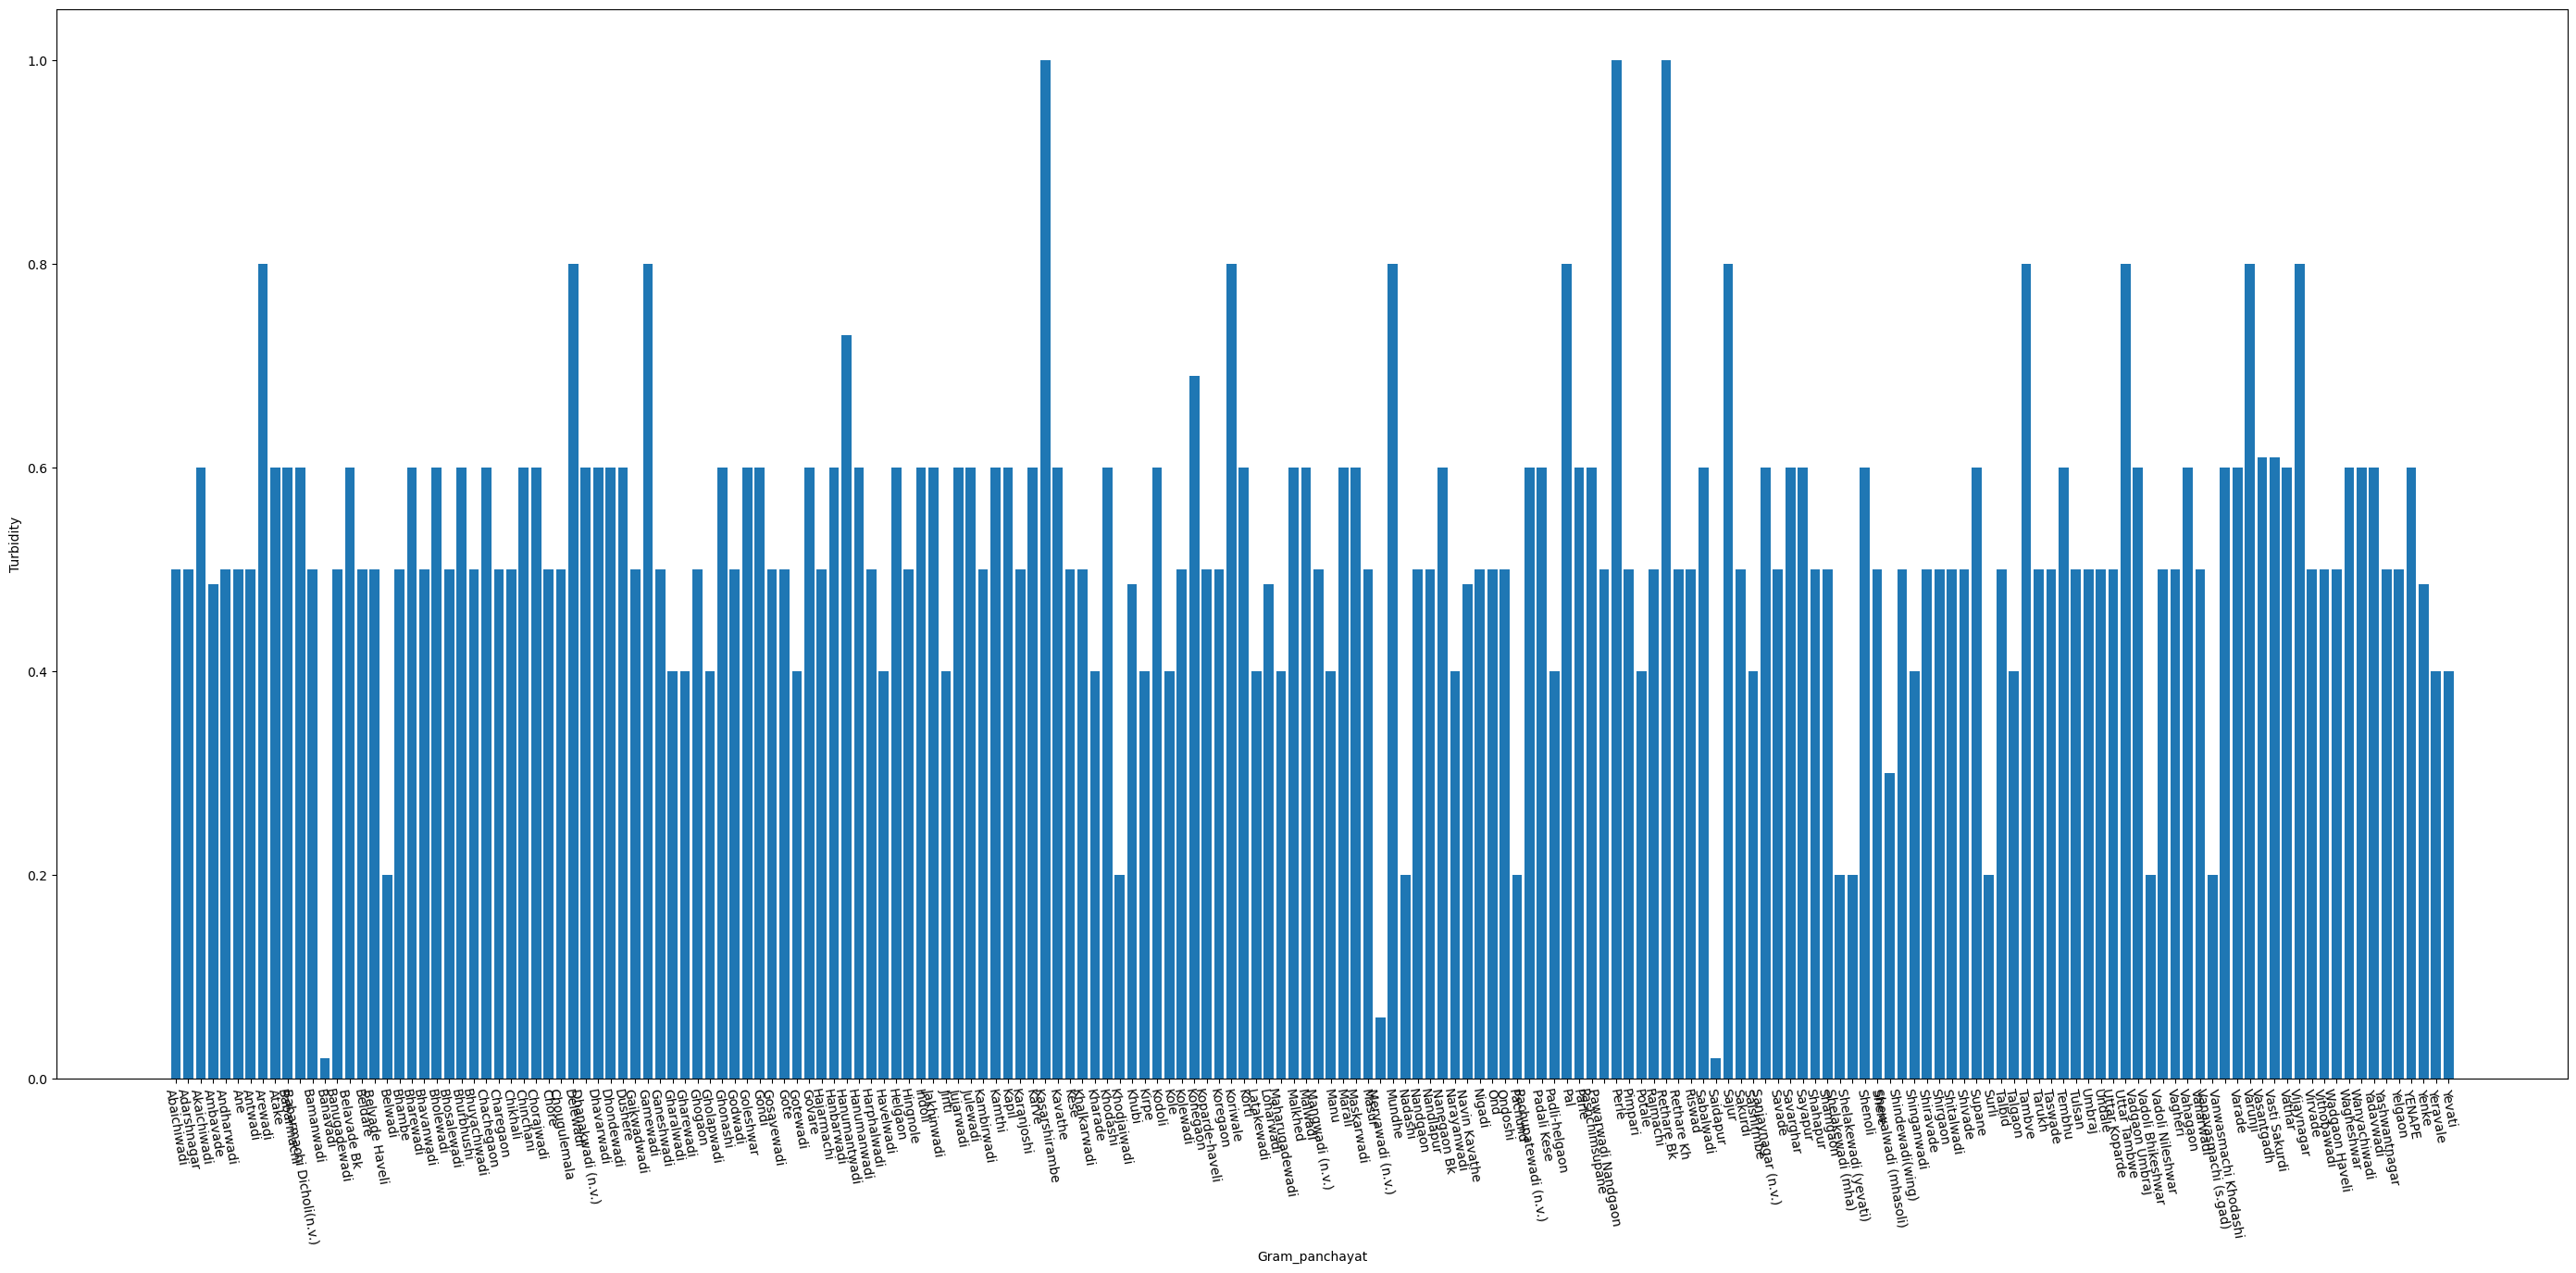

In [70]:
plt.figure(figsize=(35,15))
plt.bar(x,y)
#Gram_panchayat.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=1000)
plt.xlabel("Gram_panchayat")
plt.ylabel("Turbidity")
plt.show()

In [71]:
######################################                  Total_Alkalinity                 #######################################

In [72]:
dataset_Total_Alkalinity   = dataset.iloc[:,[0,11]]
x=dataset_Total_Alkalinity  .iloc[:,0]
y=dataset_Total_Alkalinity  .iloc[:,1]
dataset_Total_Alkalinity  .head()

Gram_panchayat   Total_Alkalinity
0    Abaichiwadi               34.0
1    Abaichiwadi               40.0
2    Abaichiwadi               40.0
3    Abaichiwadi               40.0
4    Abaichiwadi               40.0

In [73]:
Gram_panchayat = dataset_Total_Alkalinity.groupby("Gram_panchayat")

# Summary statistic of all Parameters
Gram_panchayat.describe().head()

Total_Alkalinity                                          \
                           count       mean        std   min   25%   50%   
Gram_panchayat                                                             
Abaichiwadi                  7.0  39.142857   2.267787  34.0  40.0  40.0   
Adarshnagar                  2.0  34.000000   0.000000  34.0  34.0  34.0   
Akaichiwadi                  9.0  99.333333  82.655913  34.0  50.0  50.0   
Ambavade                     5.0  37.600000   4.979960  34.0  34.0  34.0   
Andharwadi                   5.0  72.800000  20.523158  44.0  68.0  70.0   

                              
                  75%    max  
Gram_panchayat                
Abaichiwadi      40.0   40.0  
Adarshnagar      34.0   34.0  
Akaichiwadi     190.0  218.0  
Ambavade         42.0   44.0  
Andharwadi       82.0  100.0

In [74]:
Gram_panchayat.mean().sort_values(by=" Total_Alkalinity",ascending=False).head()

Total_Alkalinity
Gram_panchayat                       
Pawarwadi Nandgaon         225.500000
Nandgaon                   211.333333
Shere                      176.884557
Ghonashi                   160.666667
Dhondewadi                 146.000000

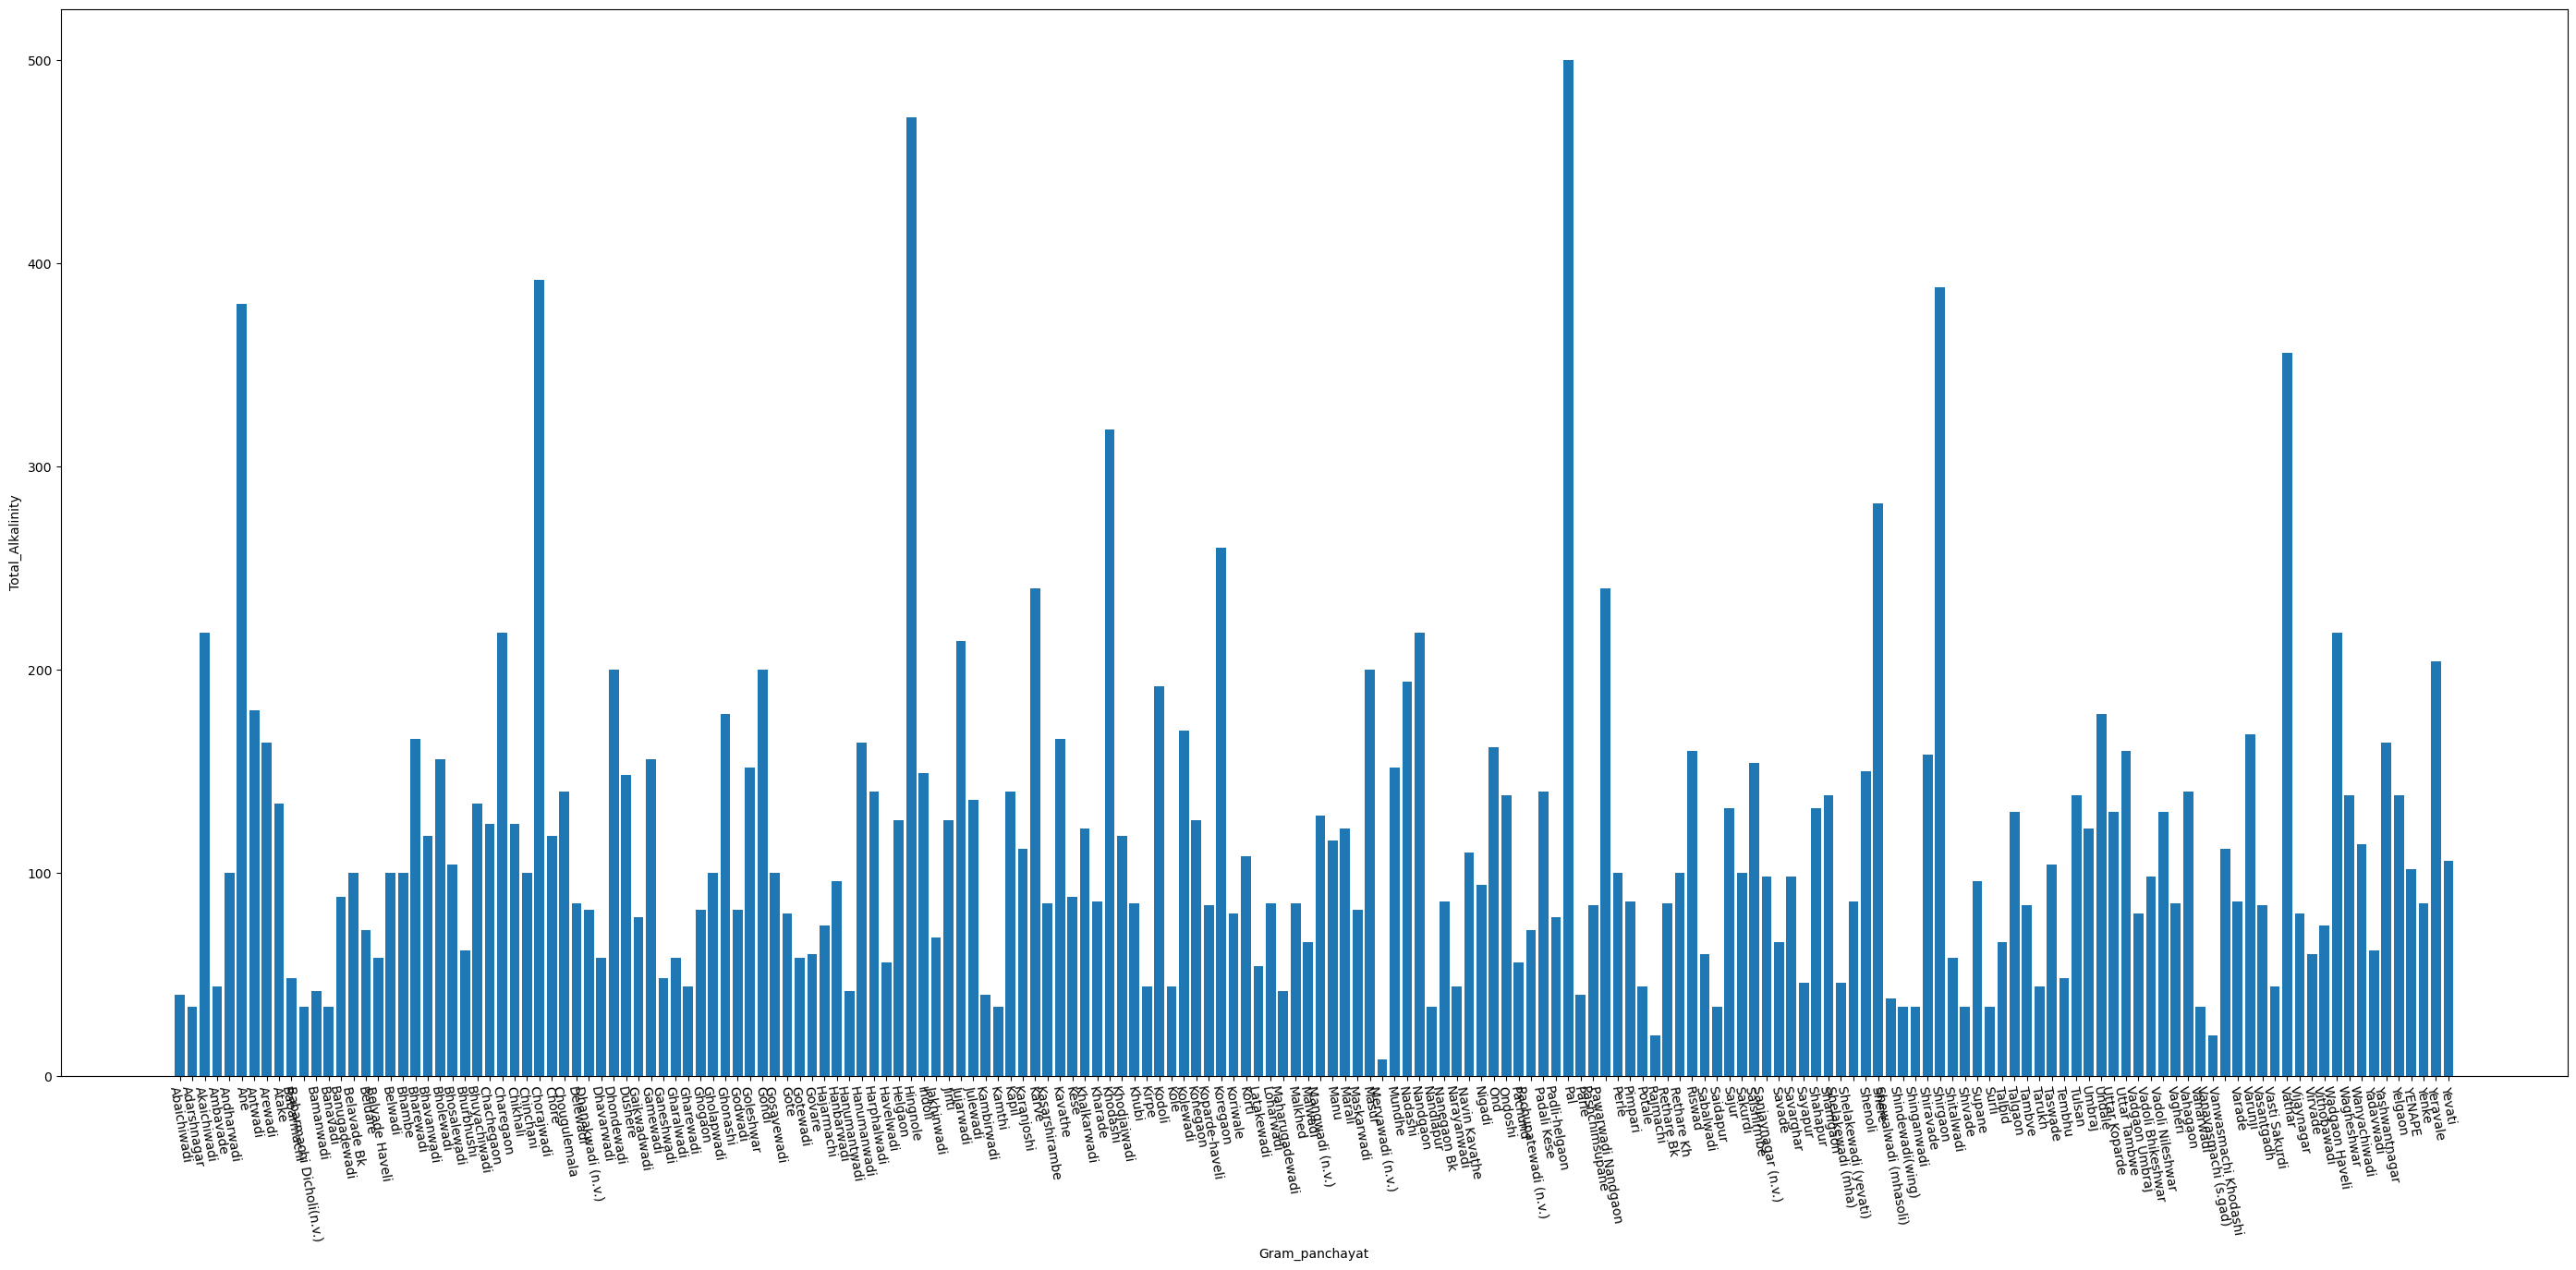

In [75]:
plt.figure(figsize=(35,15))
plt.bar(x,y)
#Gram_panchayat.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=1000)
plt.xlabel("Gram_panchayat")
plt.ylabel("Total_Alkalinity")
plt.show()

In [76]:
###################################                    Chloride                       ########################################

In [77]:
dataset_Chloride = dataset.iloc[:,[0,12]]
x=dataset_Chloride.iloc[:,0]
y=dataset_Chloride.iloc[:,1]
dataset_Chloride.head()

Gram_panchayat   Chloride
0    Abaichiwadi       33.0
1    Abaichiwadi       40.0
2    Abaichiwadi       40.0
3    Abaichiwadi       40.0
4    Abaichiwadi       40.0

In [78]:
Gram_panchayat = dataset_Chloride.groupby("Gram_panchayat")

# Summary statistic of all Parameters
Gram_panchayat.describe().head()

Chloride                                                  \
                   count       mean        std   min    25%   50%    75%   
Gram_panchayat                                                             
Abaichiwadi          7.0  41.857143   8.414839  33.0  40.00  40.0  40.00   
Adarshnagar          2.0  36.500000   4.949747  33.0  34.75  36.5  38.25   
Akaichiwadi          9.0  36.444444  17.132652  22.0  22.00  33.0  50.00   
Ambavade             5.0  38.846512   8.936553  33.0  33.00  33.0  42.00   
Andharwadi           5.0  45.200000  11.278298  32.0  40.00  40.0  56.00   

                           
                      max  
Gram_panchayat             
Abaichiwadi     60.000000  
Adarshnagar     40.000000  
Akaichiwadi     62.000000  
Ambavade        53.232558  
Andharwadi      58.000000

In [79]:
Gram_panchayat.mean().sort_values(by=" Chloride",ascending=False).head()

Chloride
Gram_panchayat                
Nandgaon            166.000000
Pawarwadi Nandgaon  164.500000
Dhondewadi          163.000000
Shenoli             159.102713
Jujarwadi           134.000000

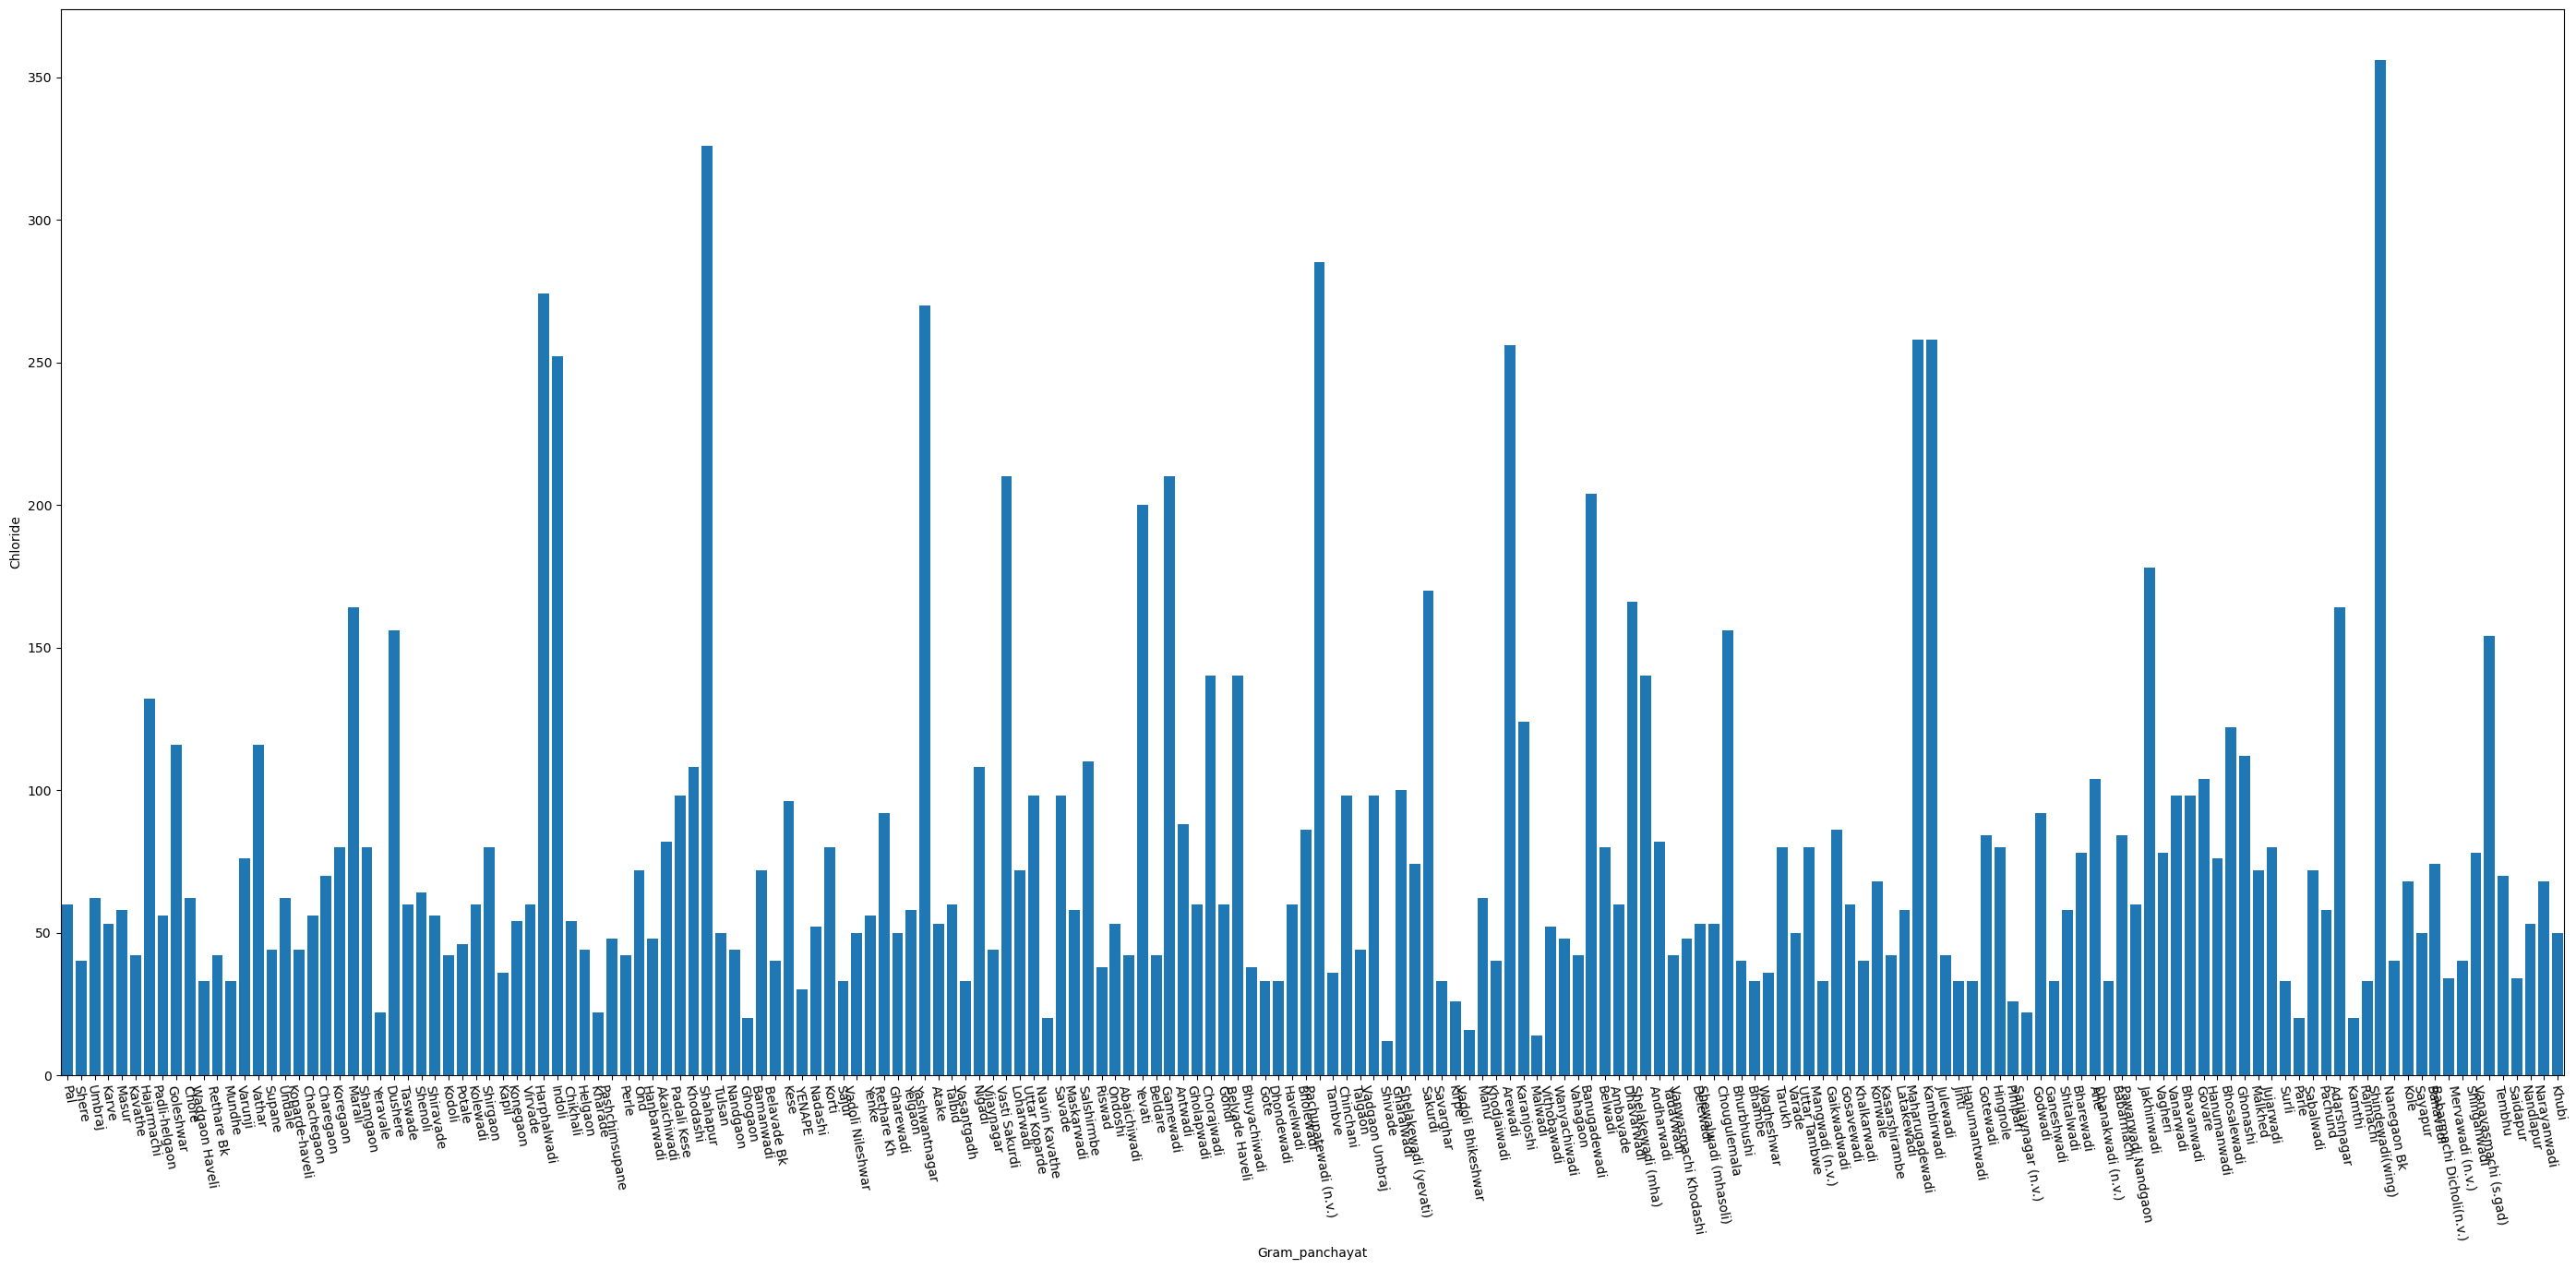

In [80]:
plt.figure(figsize=(35,15))
plt.bar(x,y)
Gram_panchayat.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=1000)
plt.xlabel("Gram_panchayat")
plt.ylabel("Chloride")
plt.show()

In [81]:
#########################      Fluoride                ###############################

In [82]:
dataset_Fluoride = dataset.iloc[:,[0,13]]
x=dataset_Fluoride.iloc[:,0]
y=dataset_Fluoride.iloc[:,1]
dataset_Fluoride.head()

Gram_panchayat   Fluoride
0    Abaichiwadi      0.001
1    Abaichiwadi      0.480
2    Abaichiwadi      0.480
3    Abaichiwadi      0.480
4    Abaichiwadi      0.480

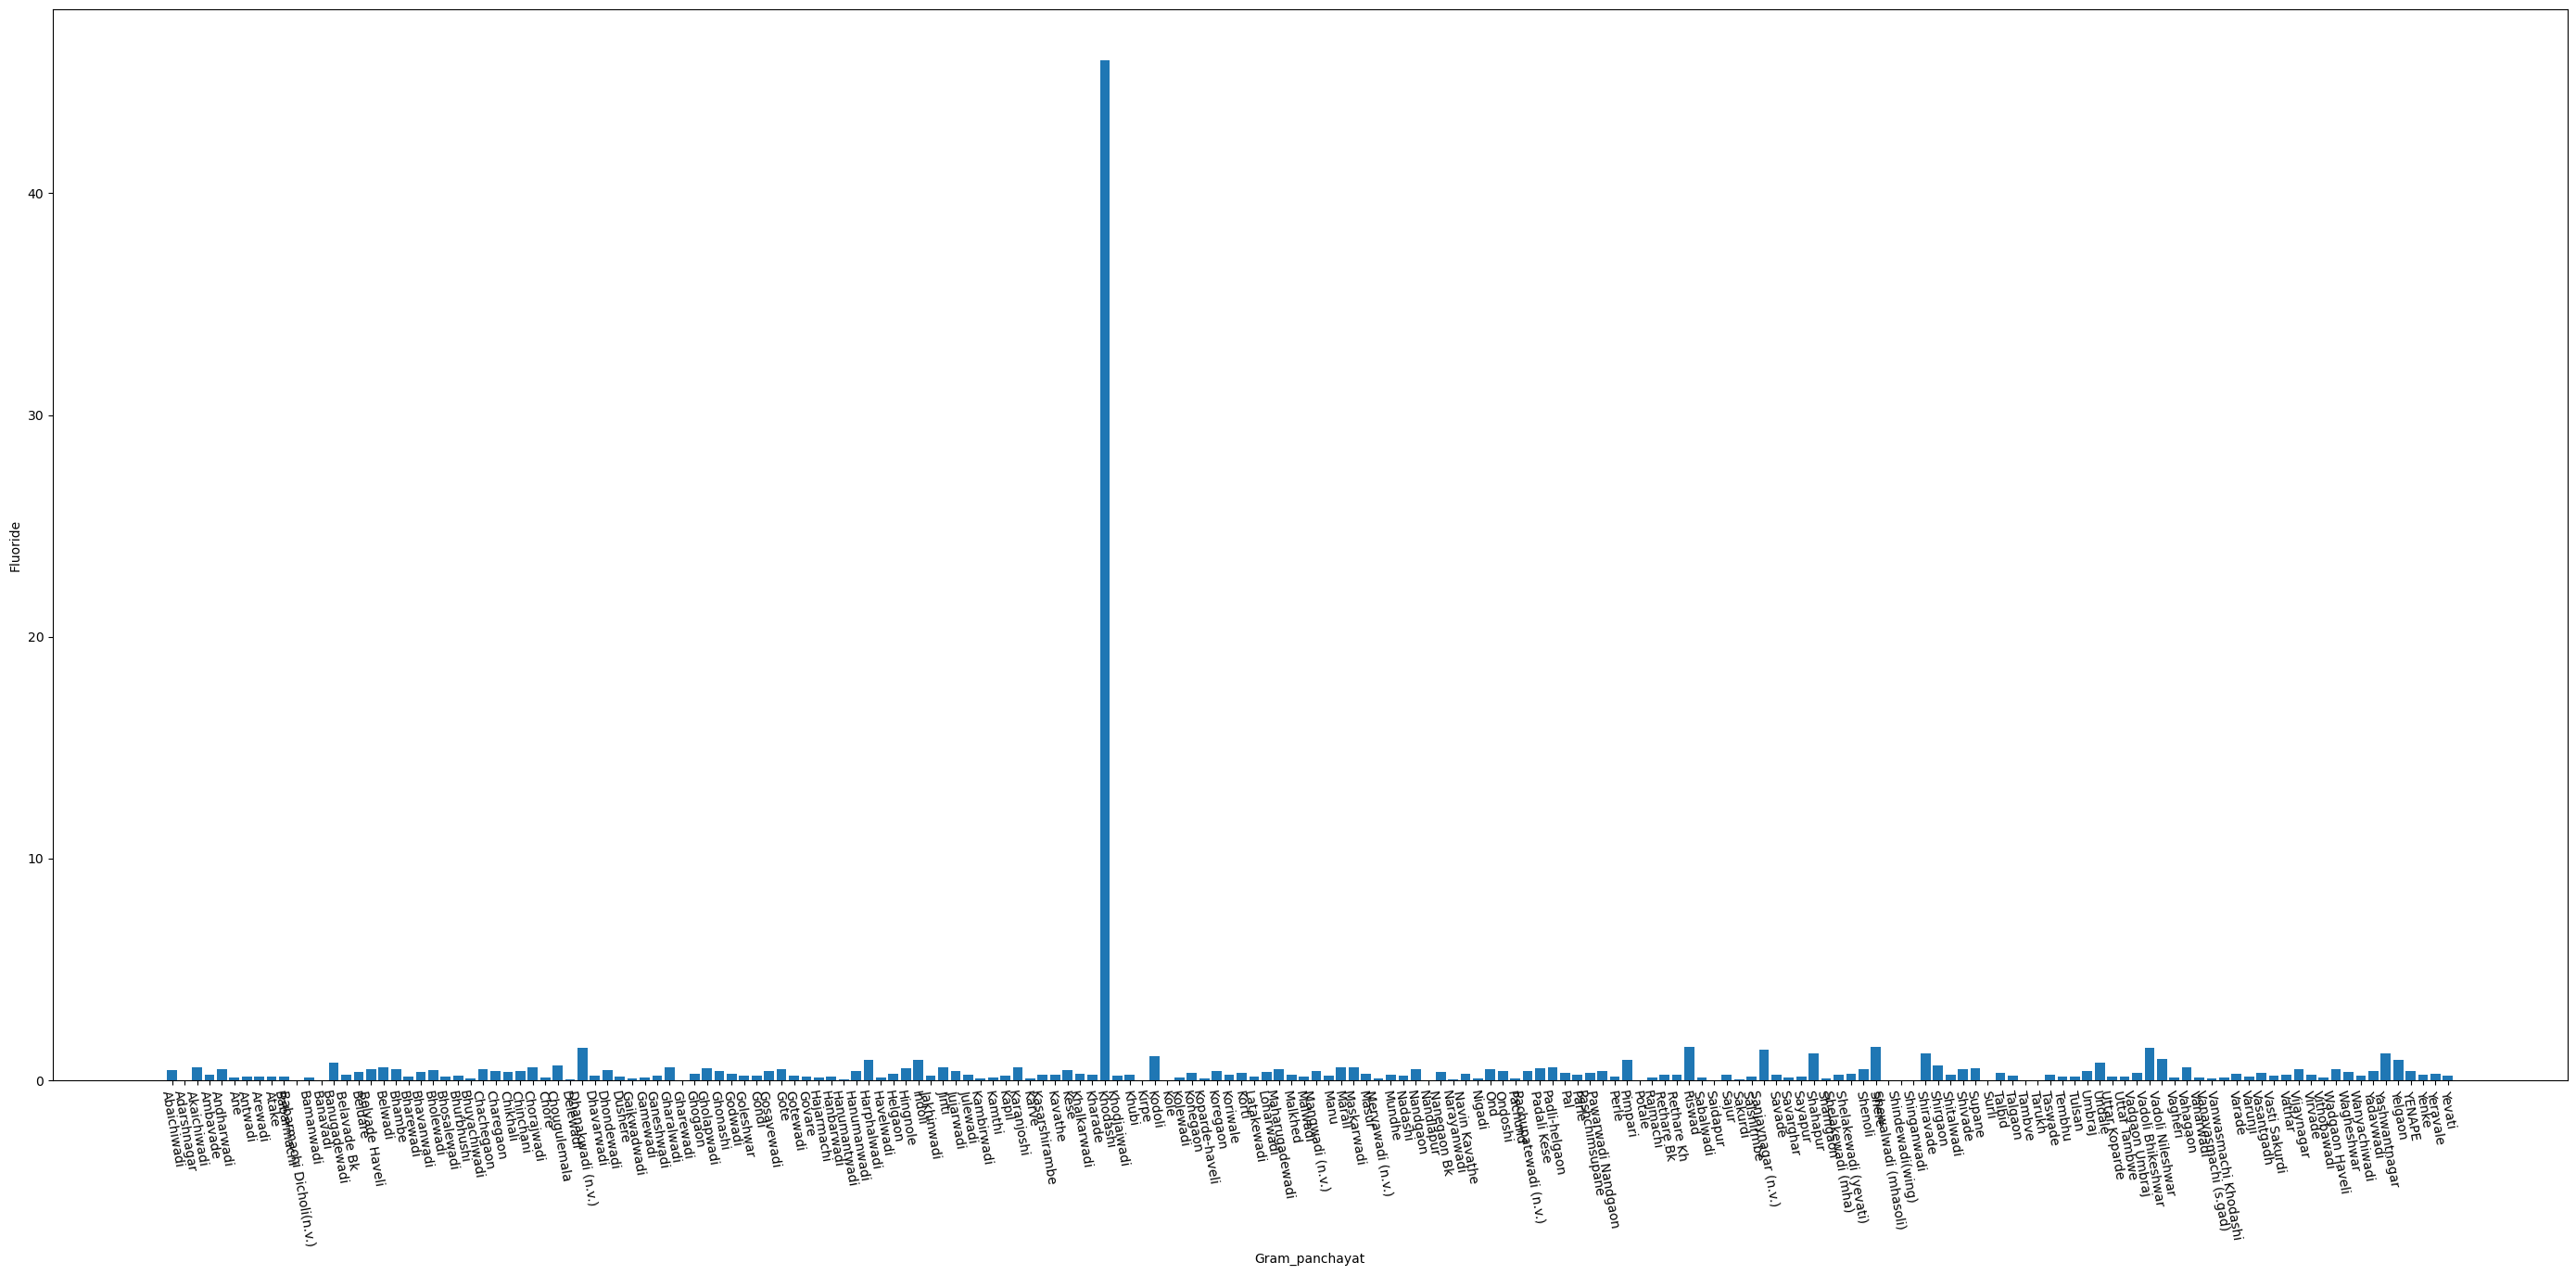

In [83]:

plt.figure(figsize=(35,15))
plt.bar(x,y)
#Gram_panchayat.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=1000)
plt.xlabel("Gram_panchayat")
plt.ylabel("Fluoride")
plt.show()

In [84]:
#################################################              Nitrate	                       #############################################

In [85]:
dataset_Nitrate = dataset.iloc[:,[0,14]]
x=dataset_Nitrate.iloc[:,0]
y=dataset_Nitrate.iloc[:,1]
dataset_Nitrate.head()

Gram_panchayat   Nitrate
0    Abaichiwadi      0.12
1    Abaichiwadi     16.99
2    Abaichiwadi     16.99
3    Abaichiwadi     16.99
4    Abaichiwadi     16.99

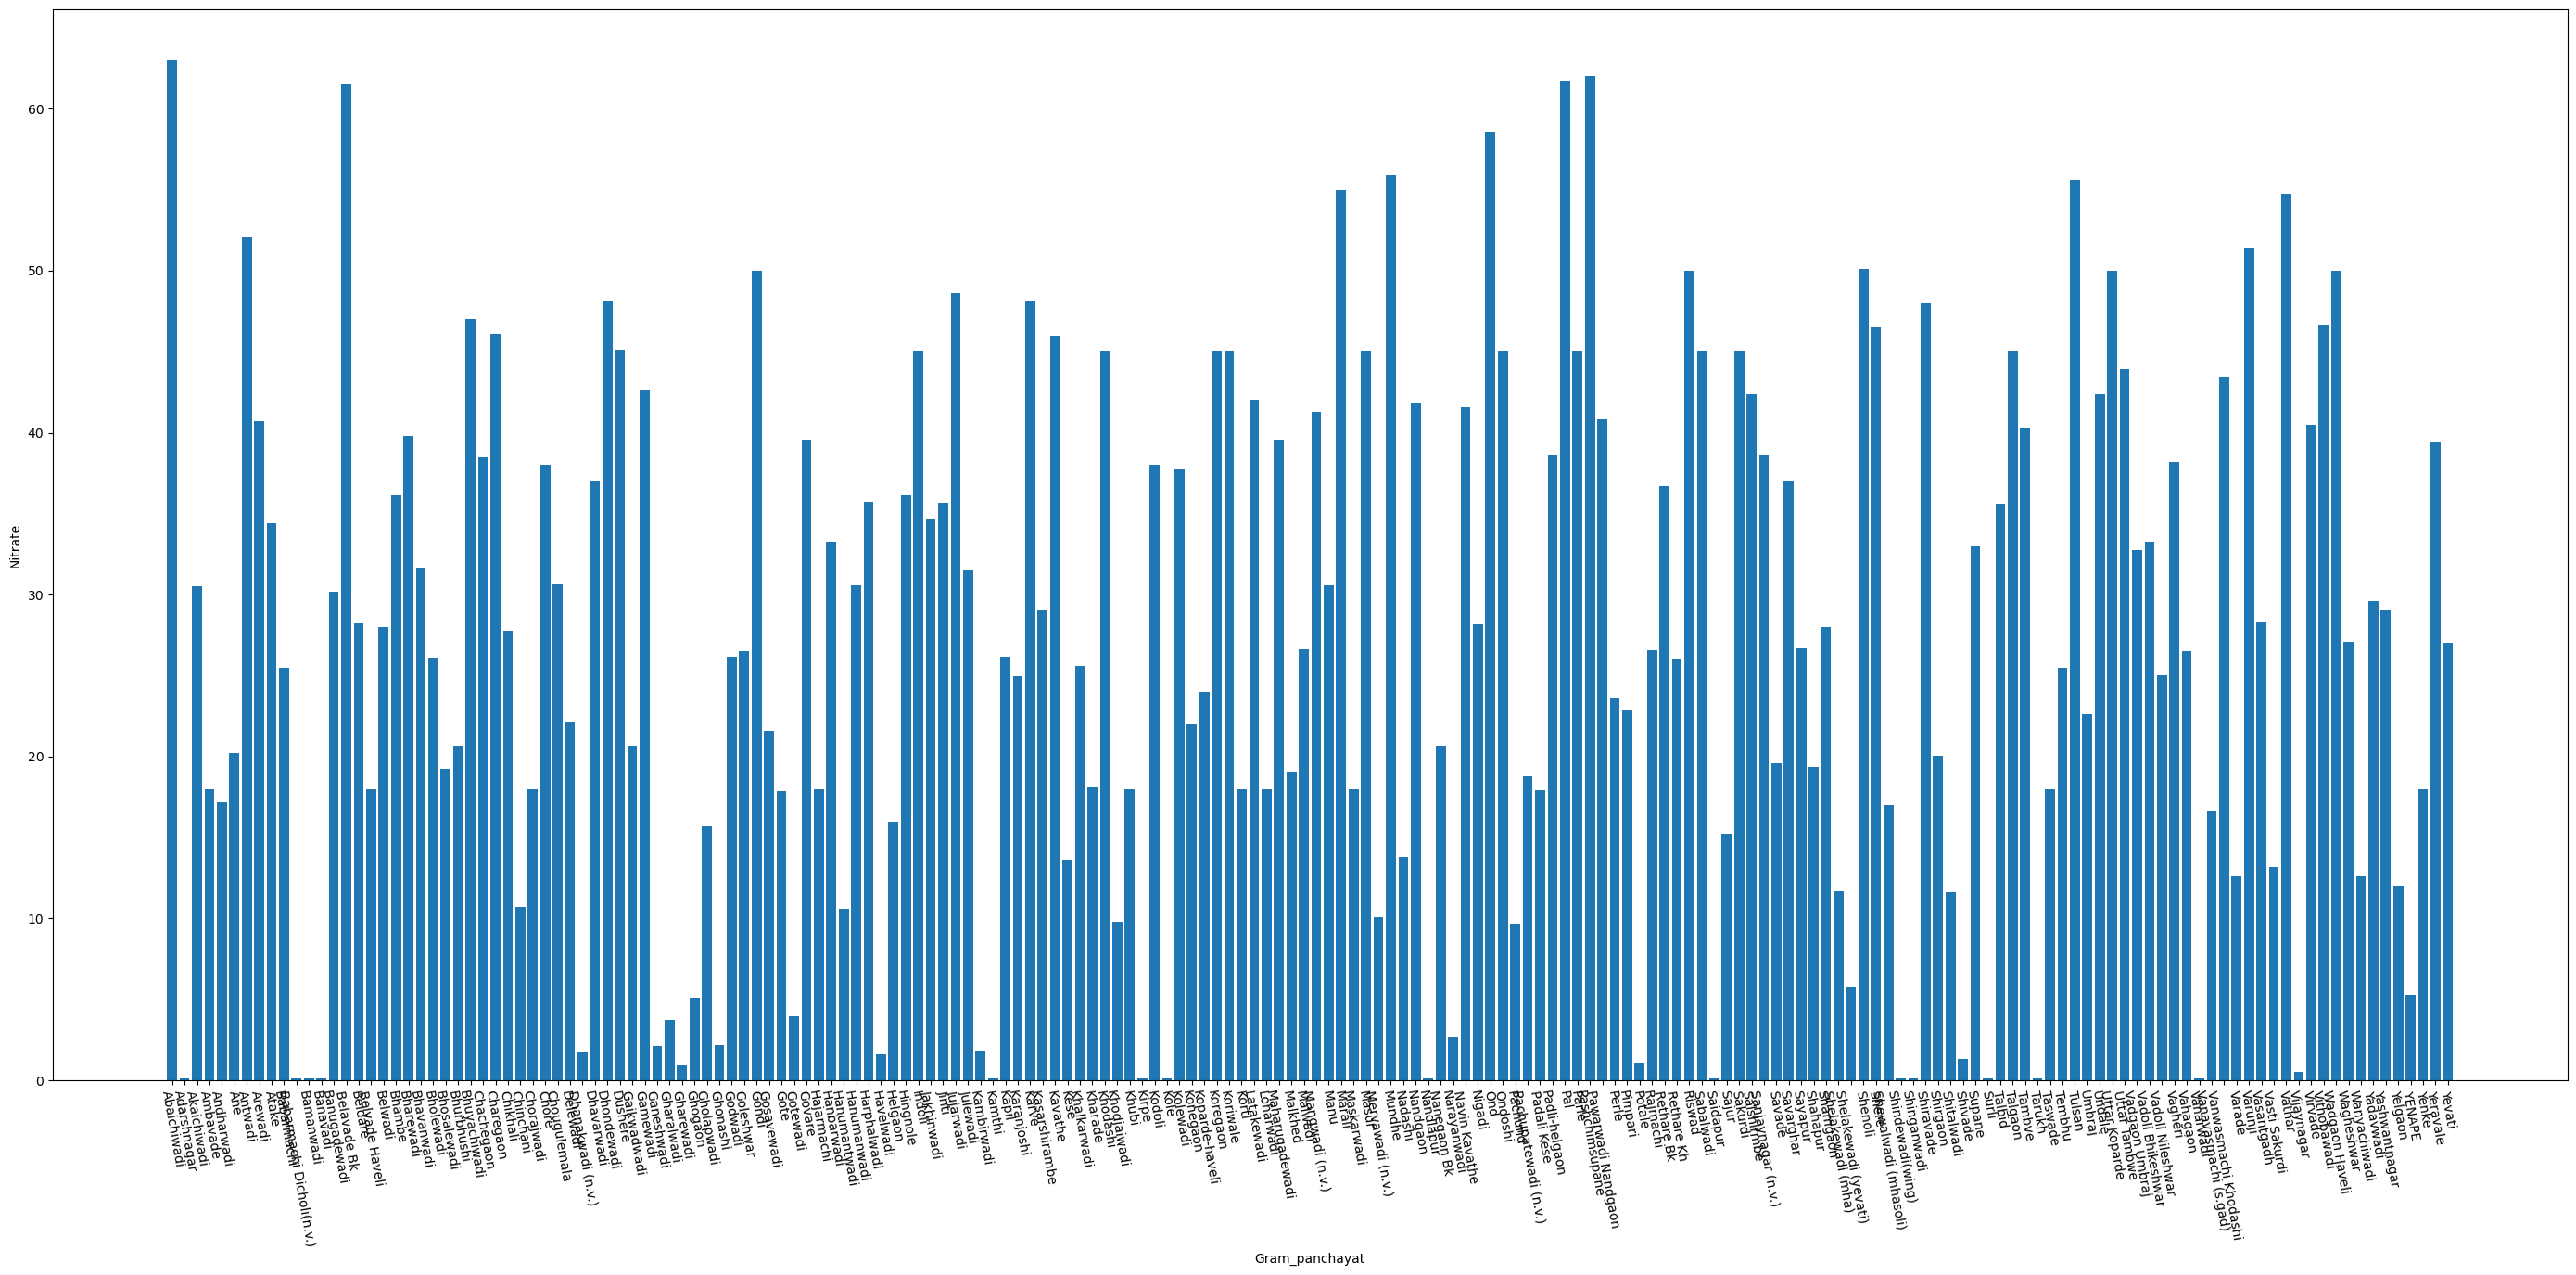

In [86]:
plt.figure(figsize=(35,15))
plt.bar(x,y)
#Gram_panchayat.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=1000)
plt.xlabel("Gram_panchayat")
plt.ylabel("Nitrate")
plt.show()

In [87]:
############################################                    Sulphate                     ################################################

In [88]:
dataset_Sulphate = dataset.iloc[:,[0,15]]
x=dataset_Sulphate.iloc[:,0]
y=dataset_Sulphate.iloc[:,1]
dataset_Sulphate.head()

Gram_panchayat   Sulphate
0    Abaichiwadi       0.90
1    Abaichiwadi       0.92
2    Abaichiwadi       0.92
3    Abaichiwadi       0.92
4    Abaichiwadi       0.92

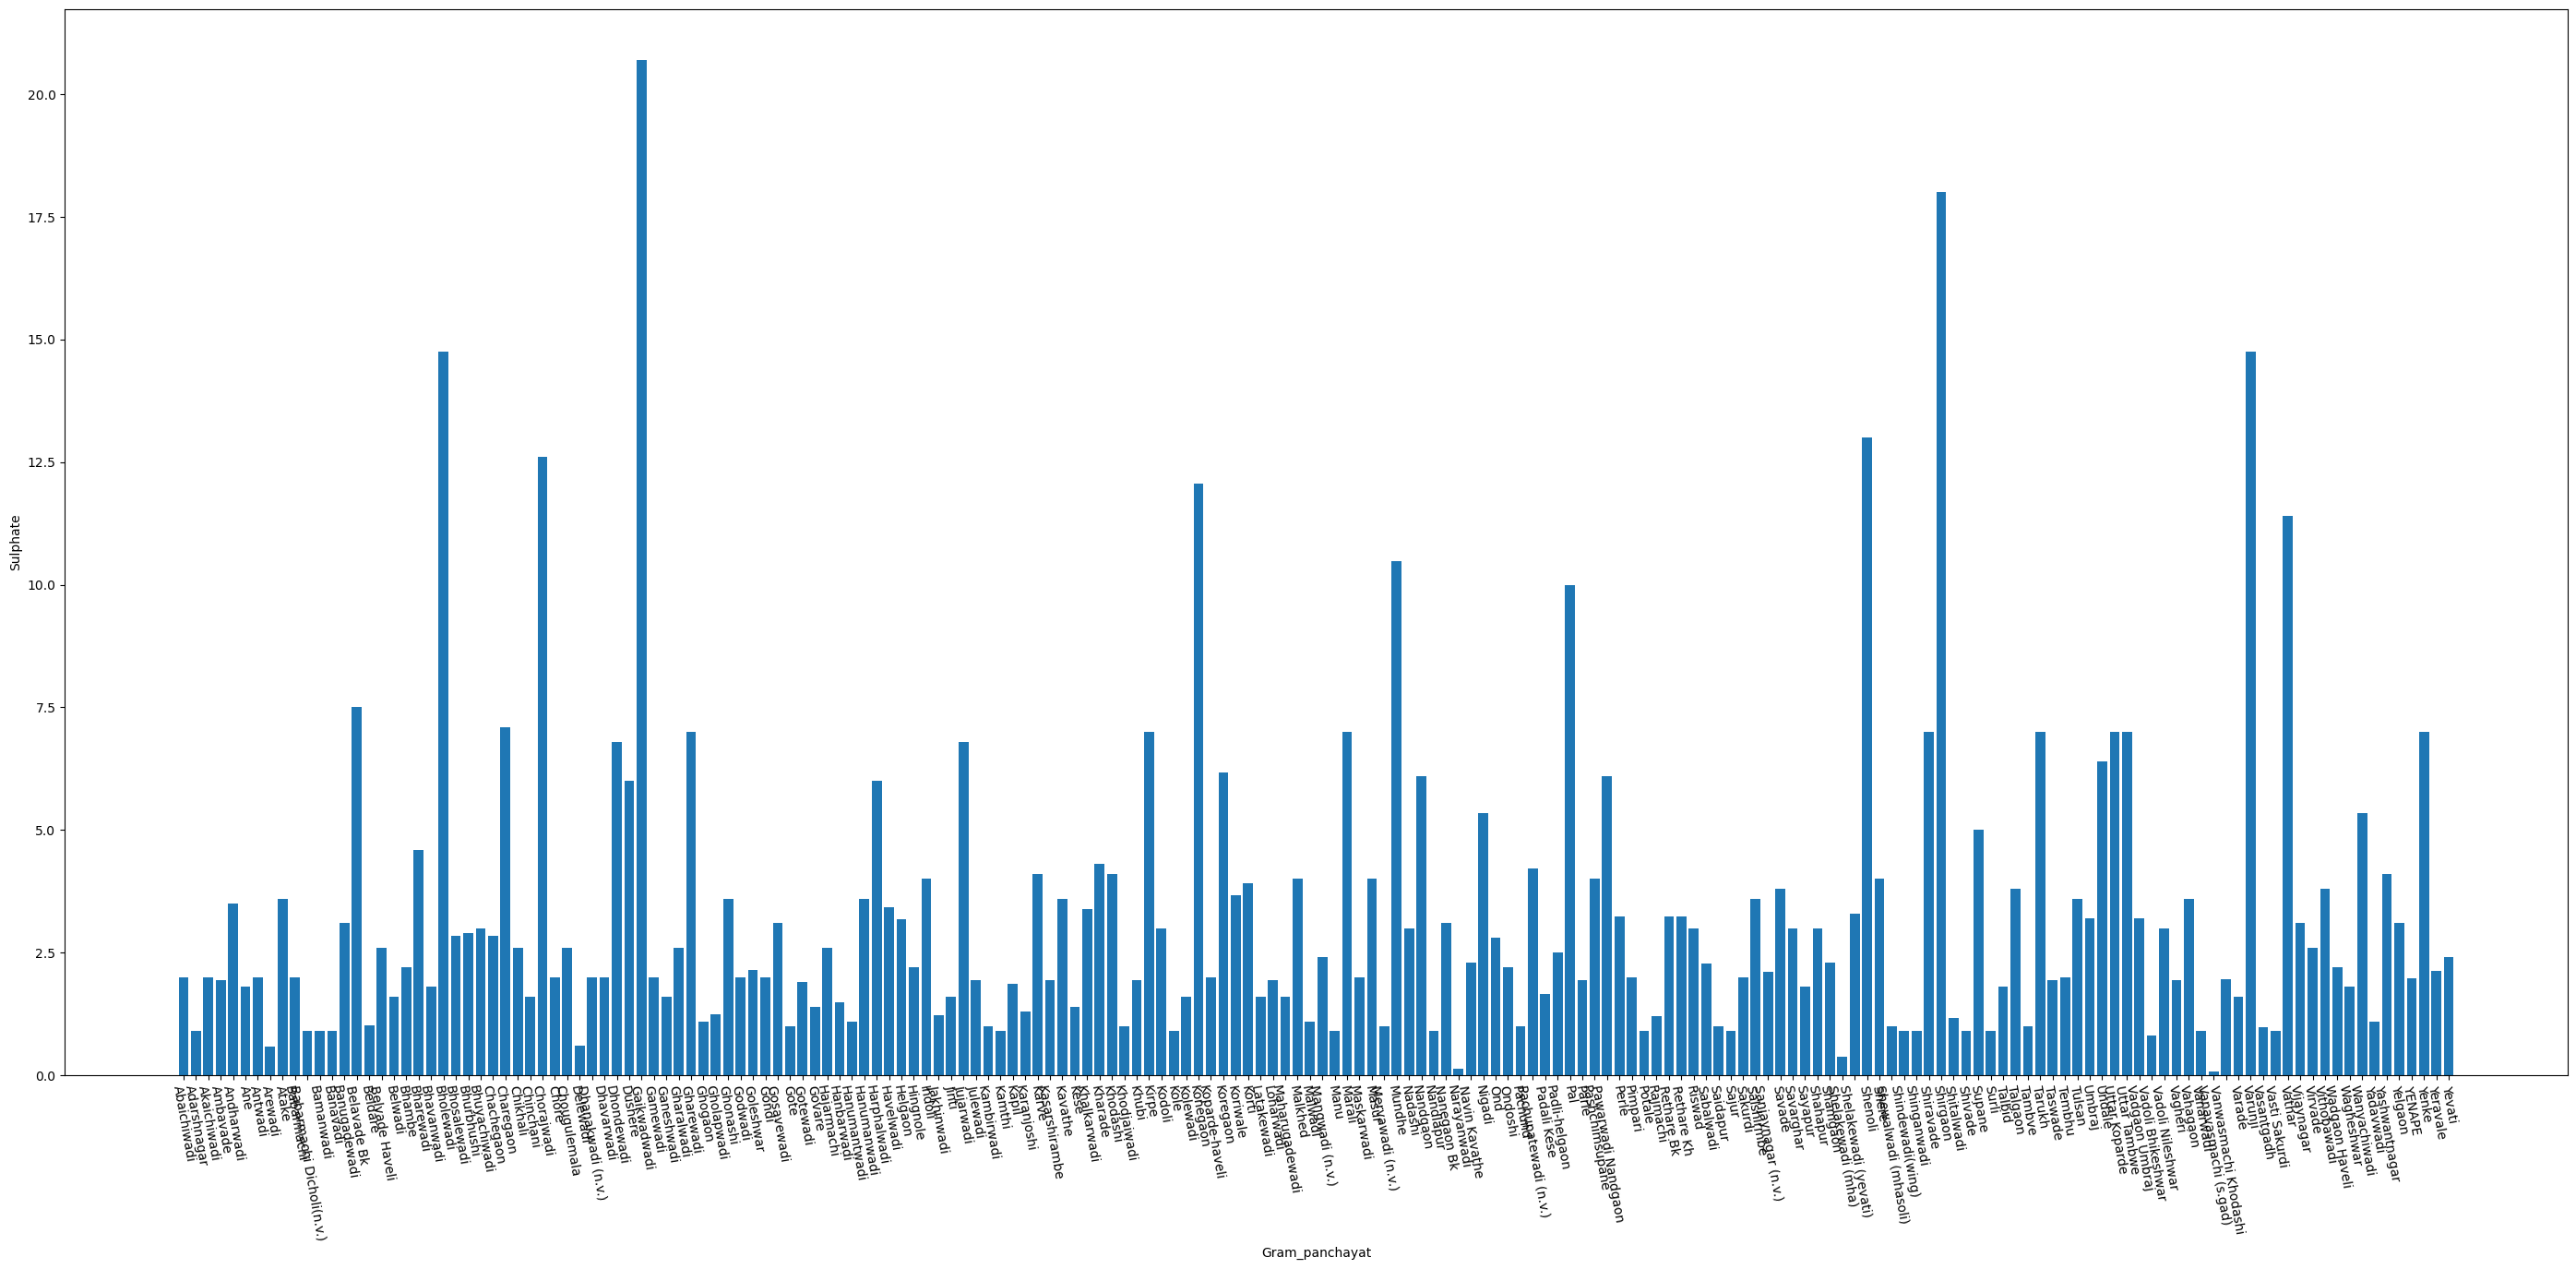

In [89]:
plt.figure(figsize=(35,15))
plt.bar(x,y)
#Gram_panchayat.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=1000)
plt.xlabel("Gram_panchayat")
plt.ylabel("Sulphate")
plt.show()

In [90]:
#########################################               Total_Hardness	                       ###############################################

In [91]:
dataset_Total_Hardness = dataset.iloc[:,[0,16]]
x=dataset_Total_Hardness.iloc[:,0]
y=dataset_Total_Hardness.iloc[:,1]
dataset_Total_Hardness.head()

Gram_panchayat   Total_Hardness
0    Abaichiwadi            186.0
1    Abaichiwadi            152.0
2    Abaichiwadi            152.0
3    Abaichiwadi            152.0
4    Abaichiwadi            152.0

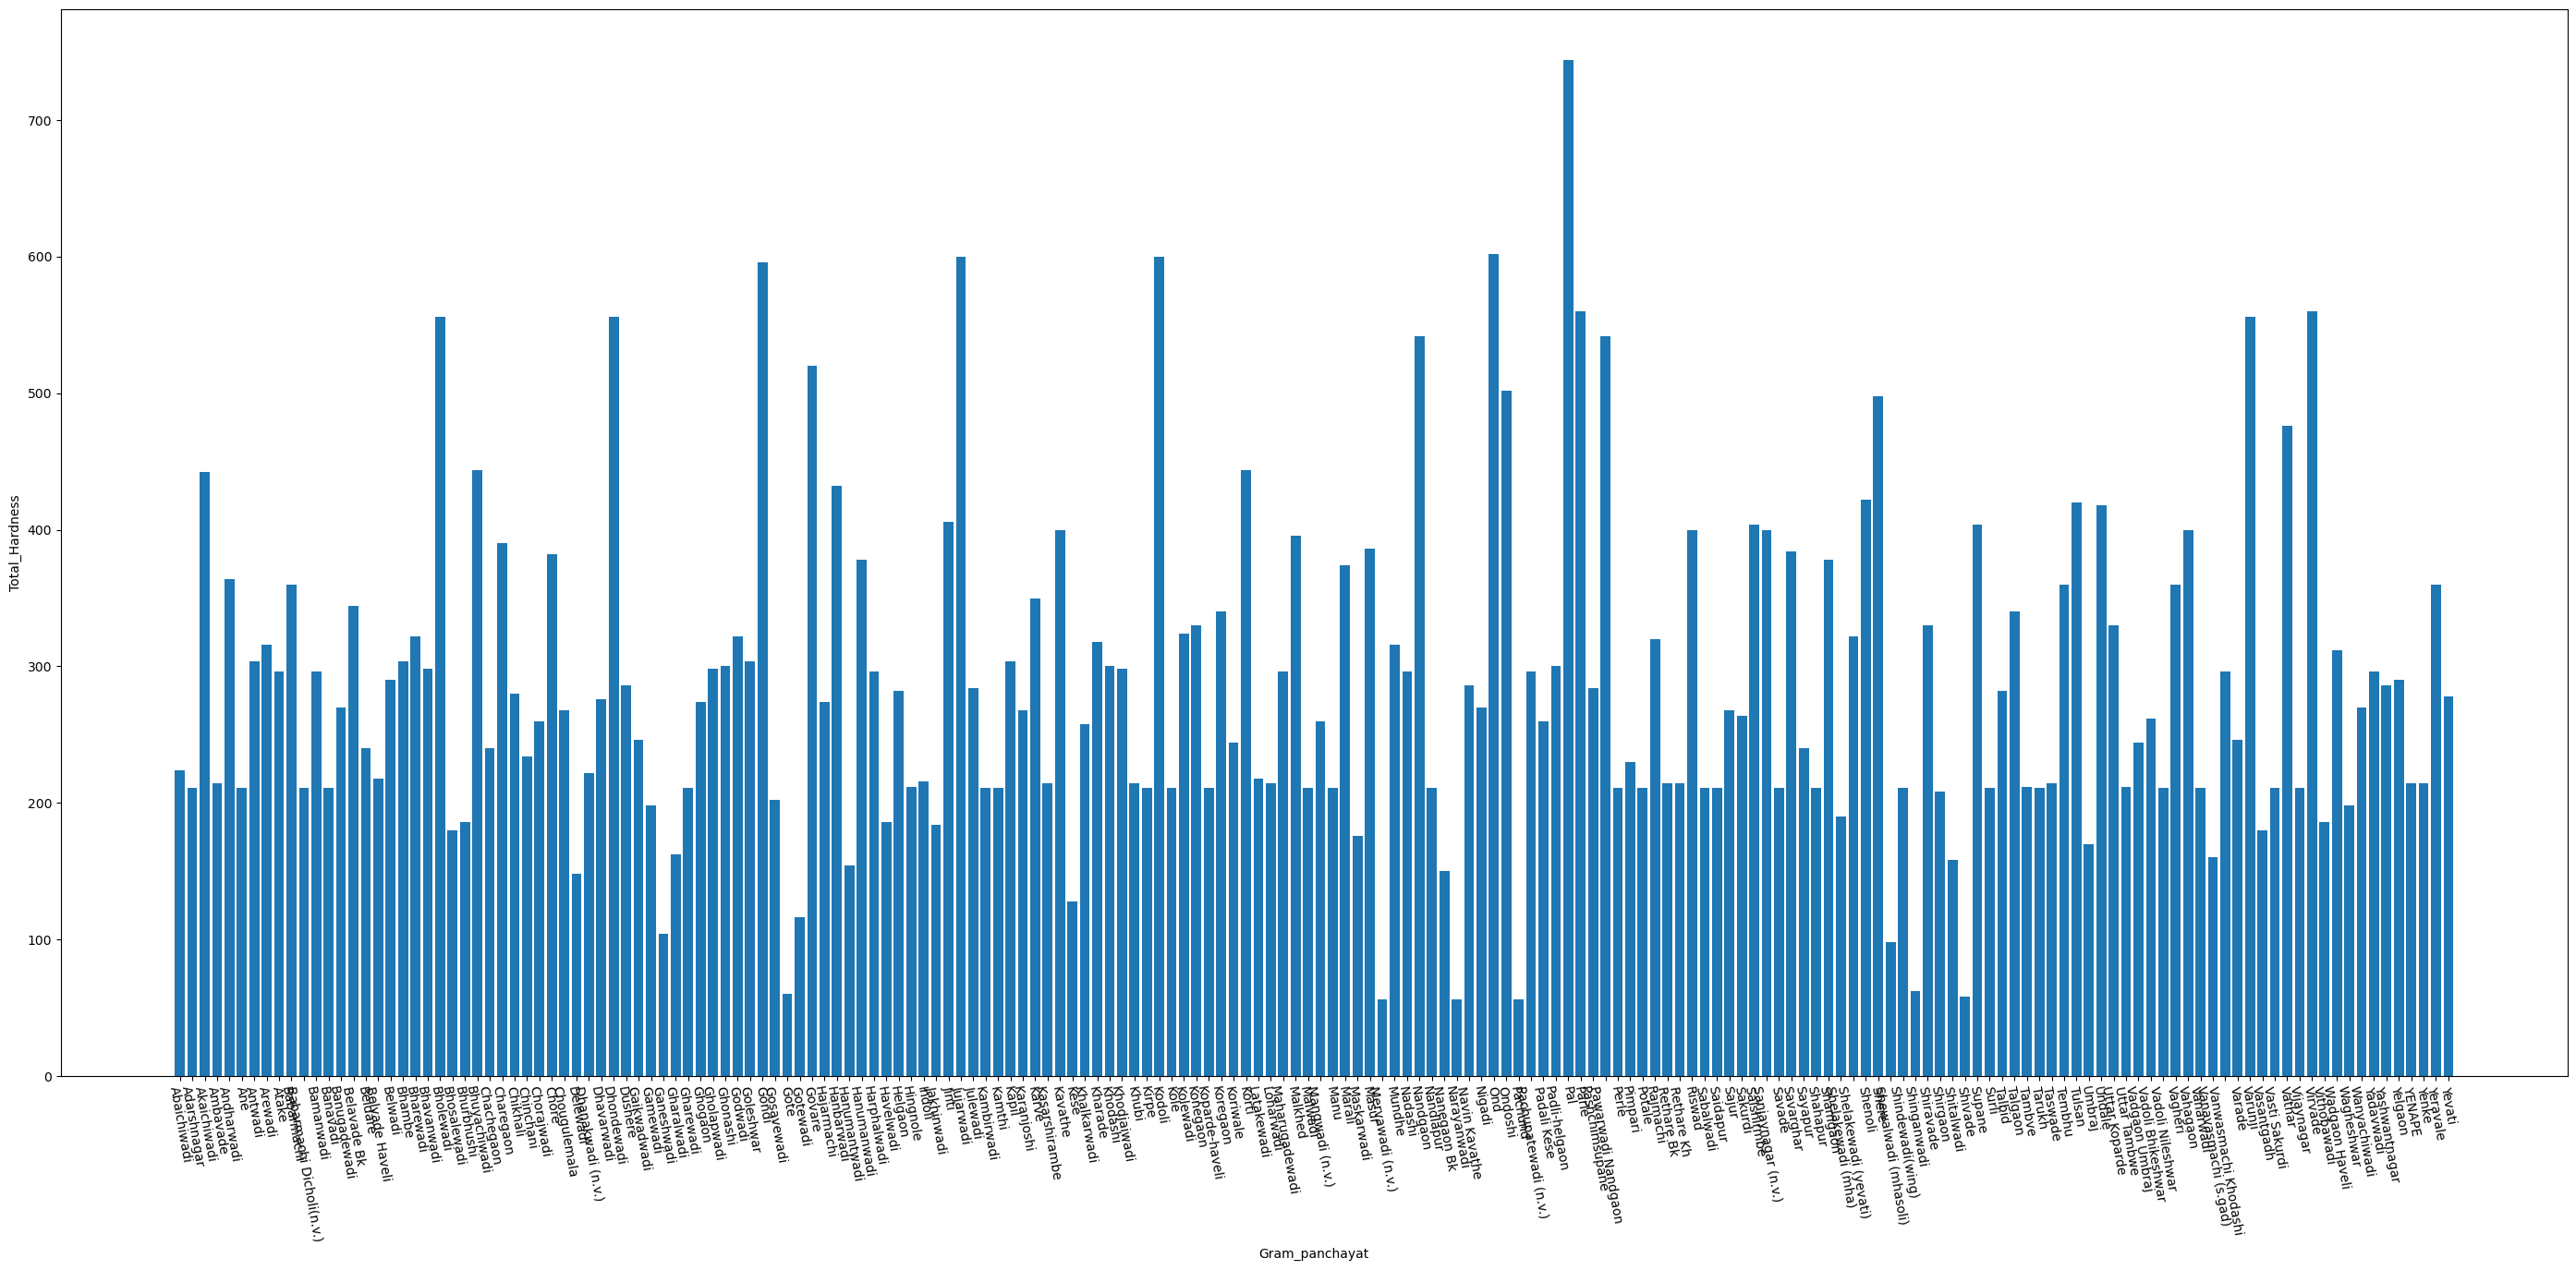

In [92]:
plt.figure(figsize=(35,15))
plt.bar(x,y)
#Gram_panchayat.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=1000)
plt.xlabel("Gram_panchayat")
plt.ylabel("Total_Hardness")
plt.show()

In [93]:
#########################################              	Iron                 #############################################

In [94]:
dataset_Iron = dataset.iloc[:,[0,17]]
x=dataset_Iron.iloc[:,0]
y=dataset_Iron.iloc[:,1]
dataset_Iron.head()

Gram_panchayat   Iron
0    Abaichiwadi   0.06
1    Abaichiwadi   0.08
2    Abaichiwadi   0.08
3    Abaichiwadi   0.08
4    Abaichiwadi   0.08

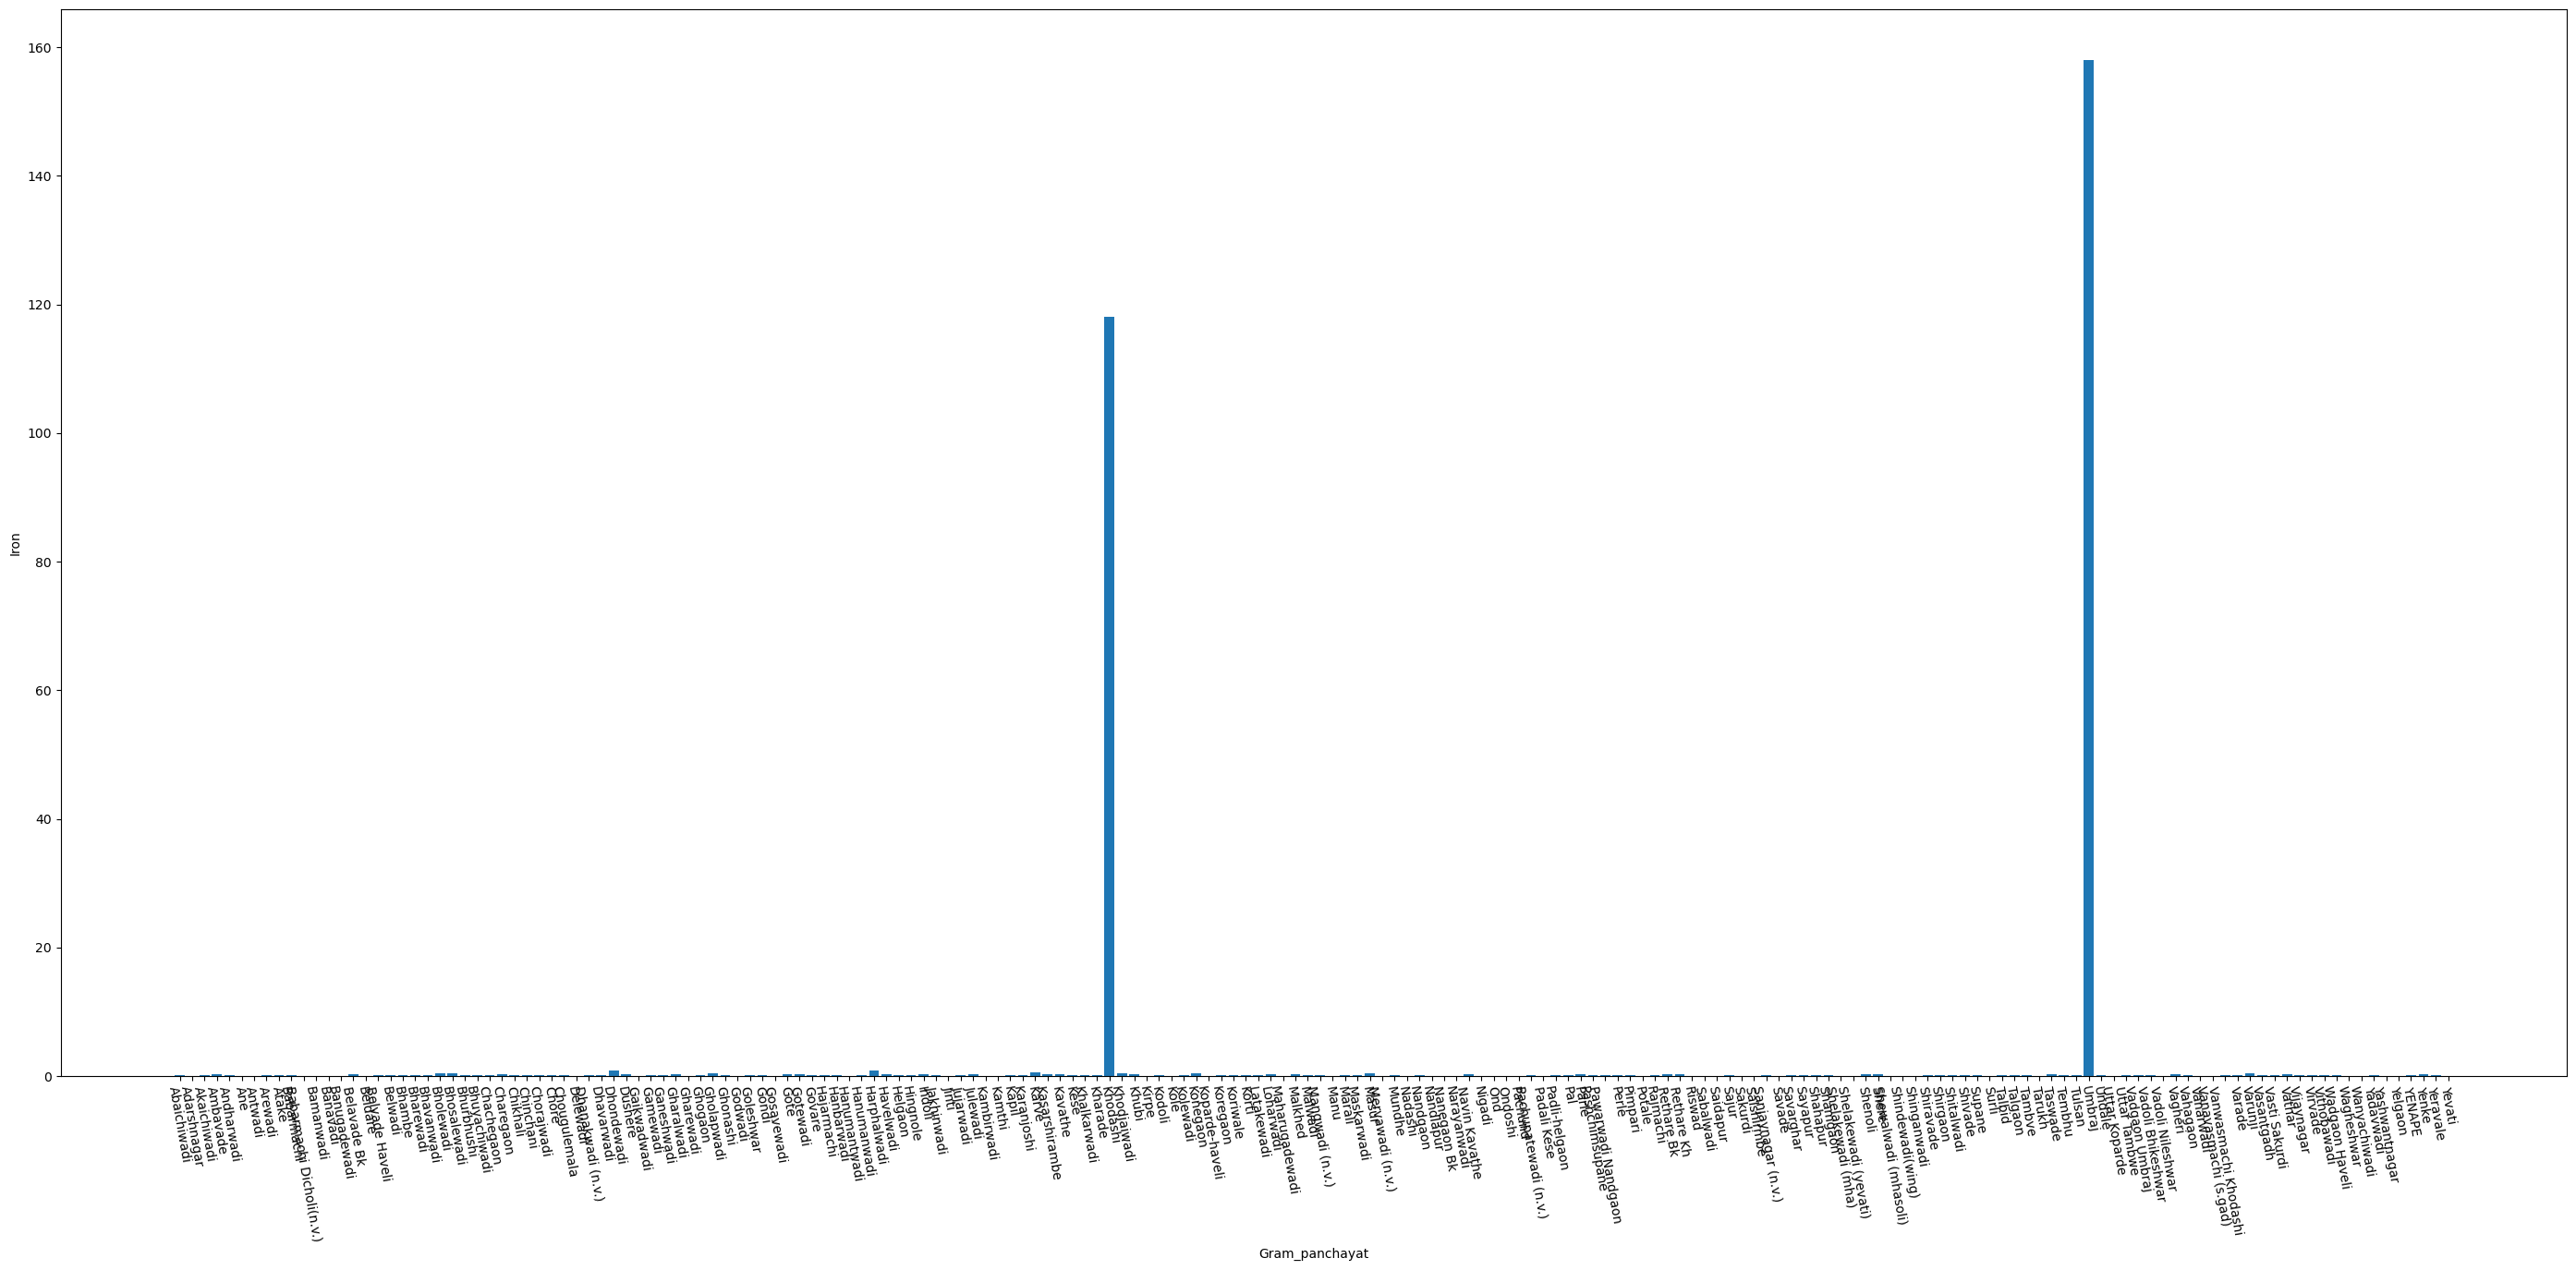

In [95]:
plt.figure(figsize=(35,15))
plt.bar(x,y)
#Gram_panchayat.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=1000)
plt.xlabel("Gram_panchayat")
plt.ylabel("Iron")
plt.show()

In [96]:
#######################################      Conductivity                    ##################################

In [97]:
dataset_conductivity = dataset.iloc[:,[0,18]]
x=dataset_conductivity.iloc[:,0]
y=dataset_conductivity.iloc[:,1]
dataset_conductivity.head()

Gram_panchayat  Conductivity
0    Abaichiwadi         210.0
1    Abaichiwadi         340.0
2    Abaichiwadi         340.0
3    Abaichiwadi         340.0
4    Abaichiwadi         340.0

In [98]:
# Gram_panchayat.mean().sort_values(by='Conductivity',ascending=False).head()

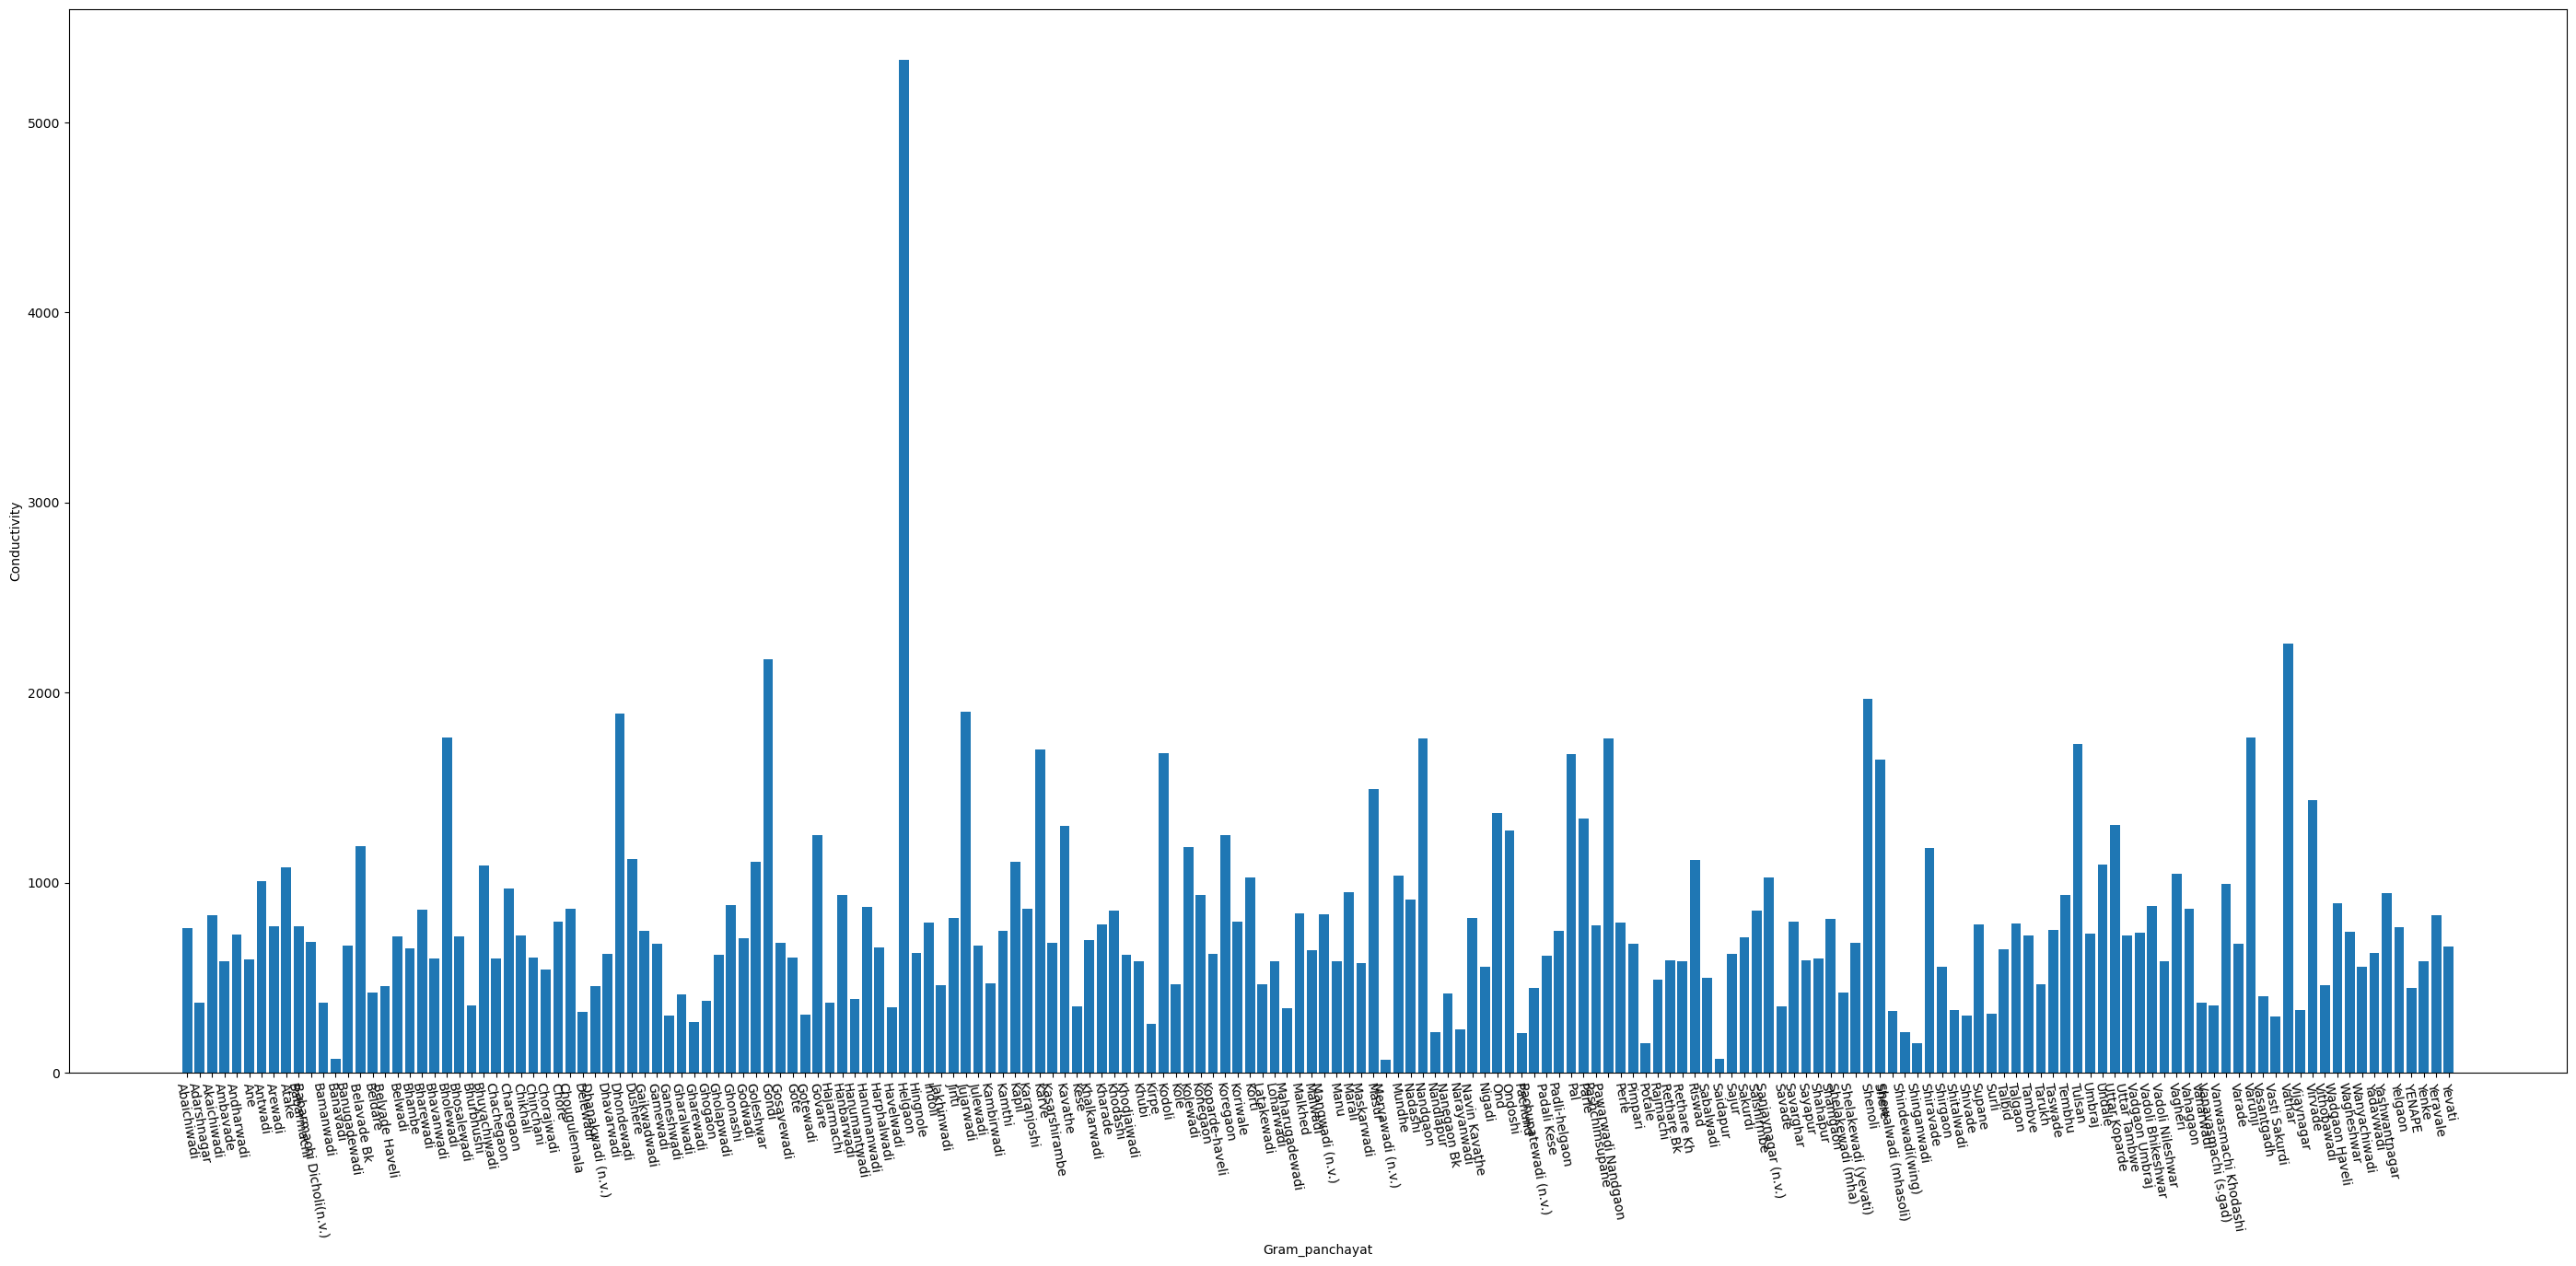

In [99]:
plt.figure(figsize=(35,15))
plt.bar(x,y)
#Gram_panchayat.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=1000)
plt.xlabel("Gram_panchayat")
plt.ylabel("Conductivity")
plt.show()

In [100]:
import plotly.express as px

fig = px.scatter (dataset, x = "Temperature", y = "TDS", color = " Total_Hardness", template = "plotly_dark",  trendline="lowess")
fig.show ()